# **FINAL PROJECT REPORT** - **GROUP 8**
# SUBJECT: DATA MINING
# *TOPIC: PREDICTING CANCER MORTALITY IN U.S. COUNTIES*
# List of members:
1. Duong Van Nhat Long - 20521561
2. Vo Đoan To Loan - 20521544
3. Nguyen Thanh Luan - 20521582
4. Dinh Thi Tu Uyen - 20522139

### About dataset: These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov and this dataset have 34 feature and 3047 samples
### Data Source: https://data.world/nrippner/ols-regression-challenge

# Import libraries and dataset

## Define function

In [1]:
# Function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

## Import necessary libraries

In [2]:
# Import to libraries that manipulate datasets and numbers: numpy, pandas, graphing libraries, data visualization: seaborn, matplotlib.
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# To use machine learning algorithms, we import the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# Predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Classification
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Read dataset

In [4]:
!gdown https://drive.google.com/uc?id=1rHXIY8AiV_E5t5bsU1BWVu8JD2ib8rBJ
path = '/content/cancer_reg.csv'
data = pd.read_csv(path, encoding = "ISO-8859-1")
data.head()

Downloading...
From: https://drive.google.com/uc?id=1rHXIY8AiV_E5t5bsU1BWVu8JD2ib8rBJ
To: /content/cancer_reg.csv
100% 734k/734k [00:00<00:00, 98.7MB/s]


avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

# Exploratory Data Annalysis

In [5]:
# View basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [6]:
# Count number of fearutes and samples
print("Number of features:", data.shape[1])
print("Number of samples :", data.shape[0])

Number of features: 34
Number of samples : 3047


This dataset have 34 features and 3047 samples

In [7]:
# Statistical statistics of quantitative attributes such as: count the number of values, maximum, minimum, mean, standard deviation, quartiles...
data.describe(include='all')

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count    3047.000000       3047.000000       3047.000000    3047.000000   
unique           NaN               NaN               NaN            NaN   
top              NaN               NaN               NaN            NaN   
freq             NaN               NaN               NaN            NaN   
mean      606.338544        185.965868        178.664063     448.268586   
std      1416.356223        504.134286         27.751511      54.560733   
min         6.000000          3.000000         59.700000     201.300000   
25%        76.000000         28.000000        161.200000     420.300000   
50%       171.000000         61.000000        178.100000     453.549422   
75%       518.000000        149.000000        195.200000     480.850000   
max     38150.000000      14010.000000        362.800000    1206.900000   

            medIncome    popEst2015  povertyPercent  studyPerCap  \
count     3047.000000  3.047000e+03     3047.000000  3047.000000   
unique            NaN           NaN             NaN          NaN   
top               NaN           NaN             NaN          NaN   
freq              NaN           NaN             NaN          NaN   
mean     47063.281917  1.026374e+05       16.878175   155.399415   
std      12040.090836  3.290592e+05        6.409087   529.628366   
min      22640.000000  8.270000e+02        3.200000     0.000000   
25%      38882.500000  1.168400e+04       12.150000     0.000000   
50%      45207.000000  2.664300e+04       15.900000     0.000000   
75%      52492.000000  6.867100e+04       20.400000    83.650776   
max     125635.000000  1.017029e+07       47.400000  9762.308998   

                 binnedInc    MedianAge  ...  PctPrivateCoverageAlone  \
count                 3047  3047.000000  ...              2438.000000   
unique                  10          NaN  ...                      NaN   
top     (54545.6, 61494.5]          NaN  ...                      NaN   
freq                   306          NaN  ...                      NaN   
mean                   NaN    45.272333  ...                48.453774   
std                    NaN    45.304480  ...                10.083006   
min                    NaN    22.300000  ...                15.700000   
25%                    NaN    37.700000  ...                41.000000   
50%                    NaN    41.000000  ...                48.700000   
75%                    NaN    44.000000  ...                55.600000   
max                    NaN   624.000000  ...                78.900000   

        PctEmpPrivCoverage PctPublicCoverage  PctPublicCoverageAlone  \
count          3047.000000       3047.000000             3047.000000   
unique                 NaN               NaN                     NaN   
top                    NaN               NaN                     NaN   
freq                   NaN               NaN                     NaN   
mean             41.196324         36.252642               19.240072   
std               9.447687          7.841741                6.113041   
min              13.500000         11.200000                2.600000   
25%              34.500000         30.900000               14.850000   
50%              41.100000         36.300000               18.800000   
75%              47.700000         41.550000               23.100000   
max              70.700000         65.100000               46.600000   

           PctWhite     PctBlack     PctAsian  PctOtherRace  \
count   3047.000000  3047.000000  3047.000000   3047.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
mean      83.645286     9.107978     1.253965      1.983523   
std       16.380025    14.534538     2.610276      3.517710   
min       10.199155     0.000000     0.000000      0.000000   
25%       77.296180     0.620675     0.254199

In [8]:
# Print out each data type of each features
dtype = pd.DataFrame(data= {'types': data.dtypes})
dtype

types
avgAnnCount              float64
avgDeathsPerYear           int64
TARGET_deathRate         float64
incidenceRate            float64
medIncome                  int64
popEst2015                 int64
povertyPercent           float64
studyPerCap              float64
binnedInc                 object
MedianAge                float64
MedianAgeMale            float64
MedianAgeFemale          float64
Geography                 object
AvgHouseholdSize         float64
PercentMarried           float64
PctNoHS18_24             float64
PctHS18_24               float64
PctSomeCol18_24          float64
PctBachDeg18_24          float64
PctHS25_Over             float64
PctBachDeg25_Over        float64
PctEmployed16_Over       float64
PctUnemployed16_Over     float64
PctPrivateCoverage       float64
PctPrivateCoverageAlone  float64
PctEmpPrivCoverage       float64
PctPublicCoverage        float64
PctPublicCoverageAlone   float64
PctWhite                 float64
PctBlack                 float64
PctAsian                 float64
PctOtherRace             float64
PctMarriedHouseholds     float64
BirthRate                float64

In [9]:
# Count data type
dtype = pd.DataFrame(data= {'types': data.dtypes})
dtype.value_counts()

types  
float64    29
int64       3
object      2
dtype: int64

We see there are 29 features of type float, 3 features of type integer, 2 features of type object

In [10]:
# Check if dataset have missing values
data.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

We see there are 3 features PctSomeCol18_24, PctEmployed16_Over, PctPrivateCoverageAlone have missing values

In [11]:
# Calculate percent of missing values and sample
missing_samples = data.isna().any(axis=1).sum()
percent_missing = (missing_samples / len(data)) * 100

print('Number missing samples:', missing_samples)
print('Percent missing samples:', percent_missing)


Number missing samples: 2456
Percent missing samples: 80.60387266163438


We see 2456 samples with missing data and with 80.6%

In [12]:
# Calculate percentage of missing values for each features and total missing values for all features
missing_data = pd.DataFrame({
    'Number missing': data.isna().sum(),
    'Percent %': (data.isna().sum() * 100 / len(data))
})
missing_data.sort_values(by='Percent %', ascending=False, inplace=True)

missing_data_total = pd.DataFrame({
    'Number missing': data.isna().sum(),
    'Percent %': (data.isna().sum() * 100 / data.size)
})

print(missing_data_total.sum())
print(missing_data.head(3))

Number missing    3046.000000
Percent %            2.940211
dtype: float64
                         Number missing  Percent %
PctSomeCol18_24                    2285  74.991795
PctPrivateCoverageAlone             609  19.986872
PctEmployed16_Over                  152   4.988513


We see that there are 3046 missing values ​​and account for about 2.94% of the total values
+ The PctSomeCol18_24 property has 2285 and is about 75%
+ The PctPrivateCoverageAlone property has 609 and is about 19%
+ The PctEmployed16_Over property has 152 and is about 5%

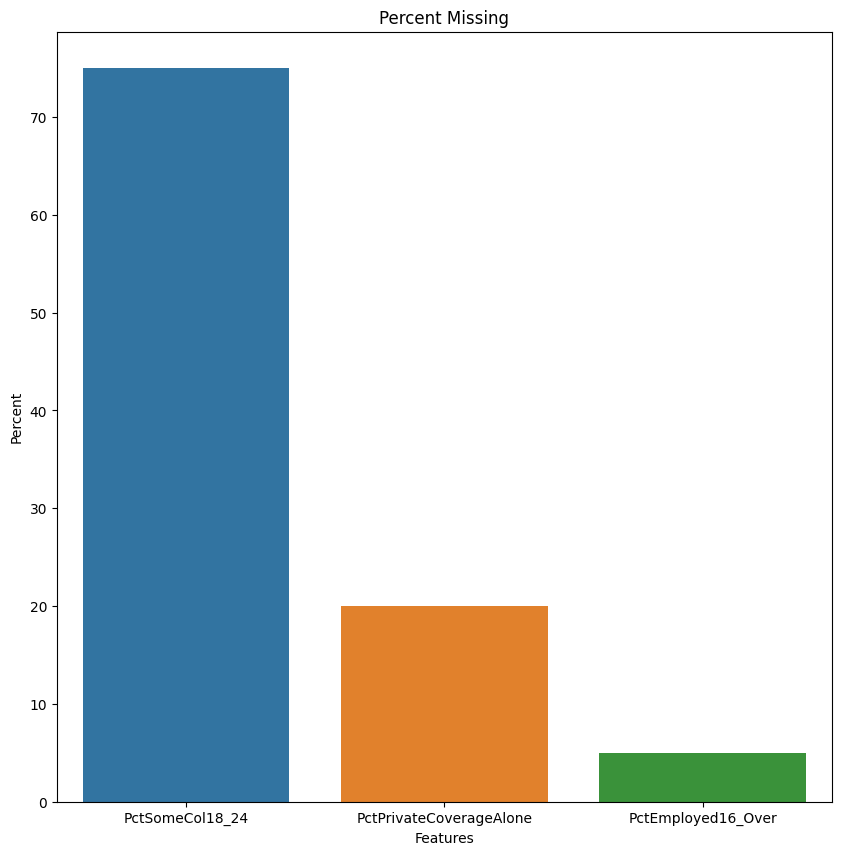

In [13]:
plt.figure(figsize=(10, 10))
sns.barplot(x=missing_data.head(3).index, y='Percent %', data=missing_data.head(3))

plt.xticks(rotation='horizontal')
plt.xlabel('Features')
plt.ylabel('Percent')
plt.title('Percent Missing')

plt.show()

We see that PctSomeCol18_24 has quite a large data loss

# Data preprocessing

## Feature extraction

Create County and State from Geography

In [14]:
# Extract County and State from Geography
County = []
State = []
for i in range(len(data)):
  County.append(data['Geography'][i][0:data['Geography'][i].find(','):])
  State.append(data['Geography'][i][data['Geography'][i].find(',') + 2::])

data['County'] = County
data['State'] = State

# Let's see what we've got
data[['Geography', 'County', 'State']].sample(5)

Geography             County           State
374       Cortland County, New York    Cortland County        New York
2138  Duplin County, North Carolina      Duplin County  North Carolina
1532         Mayes County, Oklahoma       Mayes County        Oklahoma
843    Tangipahoa Parish, Louisiana  Tangipahoa Parish       Louisiana
2644          Early County, Georgia       Early County         Georgia

Discrete binnedInc feature (replace by number of the decile)

In [15]:
data[['binnedInc']]

binnedInc
0      (61494.5, 125635]
1     (48021.6, 51046.4]
2     (48021.6, 51046.4]
3       (42724.4, 45201]
4     (48021.6, 51046.4]
...                  ...
3042    (45201, 48021.6]
3043  (48021.6, 51046.4]
3044  (51046.4, 54545.6]
3045  (48021.6, 51046.4]
3046  (40362.7, 42724.4]

[3047 rows x 1 columns]

In [16]:
# Get the range
start = []
end = []
for i in range(len(data)):
  start.append(float(data['binnedInc'][i][1:data['binnedInc'][i].find(','):]))
  end.append(float(data['binnedInc'][i][data['binnedInc'][i].find(',') + 2:-1:]))

df_range = pd.DataFrame(data= {'Start': start, 'End': end})
df_range.head(5)

Start       End
0  61494.5  125635.0
1  48021.6   51046.4
2  48021.6   51046.4
3  42724.4   45201.0
4  48021.6   51046.4

In [17]:
# Create binnedInc_mean (float) from binnedInc
data['binnedInc_mean'] = (df_range['Start'] + df_range['End'])/2
data[['binnedInc', 'binnedInc_mean']].head(5)

binnedInc  binnedInc_mean
0   (61494.5, 125635]        93564.75
1  (48021.6, 51046.4]        49534.00
2  (48021.6, 51046.4]        49534.00
3    (42724.4, 45201]        43962.70
4  (48021.6, 51046.4]        49534.00

In [18]:
# Create binnedInc_decile (category) from binnedInc_mean
# get start unique
origin = np.sort(np.unique(np.array(data['binnedInc_mean'])))
# create map list
decile = np.arange(1, 11, 1, dtype=int)
map = {origin[i]: int(decile[i]) for i in range(len(origin))}
print(origin)
print(decile)
print(map)

[28429.05 35815.95 38888.25 41543.55 43962.7  46611.3  49534.   52796.
 58020.05 93564.75]
[ 1  2  3  4  5  6  7  8  9 10]
{28429.05: 1, 35815.95: 2, 38888.25: 3, 41543.55: 4, 43962.7: 5, 46611.3: 6, 49534.0: 7, 52796.0: 8, 58020.05: 9, 93564.75: 10}


In [19]:
data['binnedInc_decile'] = data['binnedInc_mean'].replace(map)
data[['binnedInc','binnedInc_decile','binnedInc_mean']].head()

binnedInc  binnedInc_decile  binnedInc_mean
0   (61494.5, 125635]              10.0        93564.75
1  (48021.6, 51046.4]               7.0        49534.00
2  (48021.6, 51046.4]               7.0        49534.00
3    (42724.4, 45201]               5.0        43962.70
4  (48021.6, 51046.4]               7.0        49534.00

## Features encoding

We need to encoder ['County', 'State'] before give them to sklearn model
.But 'County' have high Cardinality so that we should not encoder it

In [20]:
len(data['County'].unique())

1819

In [21]:
len(data['State'].unique())

51

In [22]:
# Label Encoder 'State'

label_encoder = preprocessing.LabelEncoder()

data['State_enc']= label_encoder.fit_transform(data['State'])
data['State_enc'].unique()

array([47, 48, 49, 27, 28, 29, 30, 31, 32, 46, 22, 23, 33, 34,  0,  3,  4,
       26, 42, 43, 18, 19, 20, 21, 44, 45,  5, 50, 24, 25, 16, 17,  6,  7,
        8,  9, 36, 37, 35, 38, 39, 40, 14, 15, 10, 11, 12, 13,  1,  2, 41])

In [23]:
data['State_enc']

0       47
1       47
2       47
3       47
4       47
        ..
3042    16
3043    16
3044    16
3045    16
3046    16
Name: State_enc, Length: 3047, dtype: int64

Let's use corelation matrix to see relation of features


<ipython-input-24-9c84a701487e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(data.corr())
<ipython-input-24-9c84a701487e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),


<Axes: >

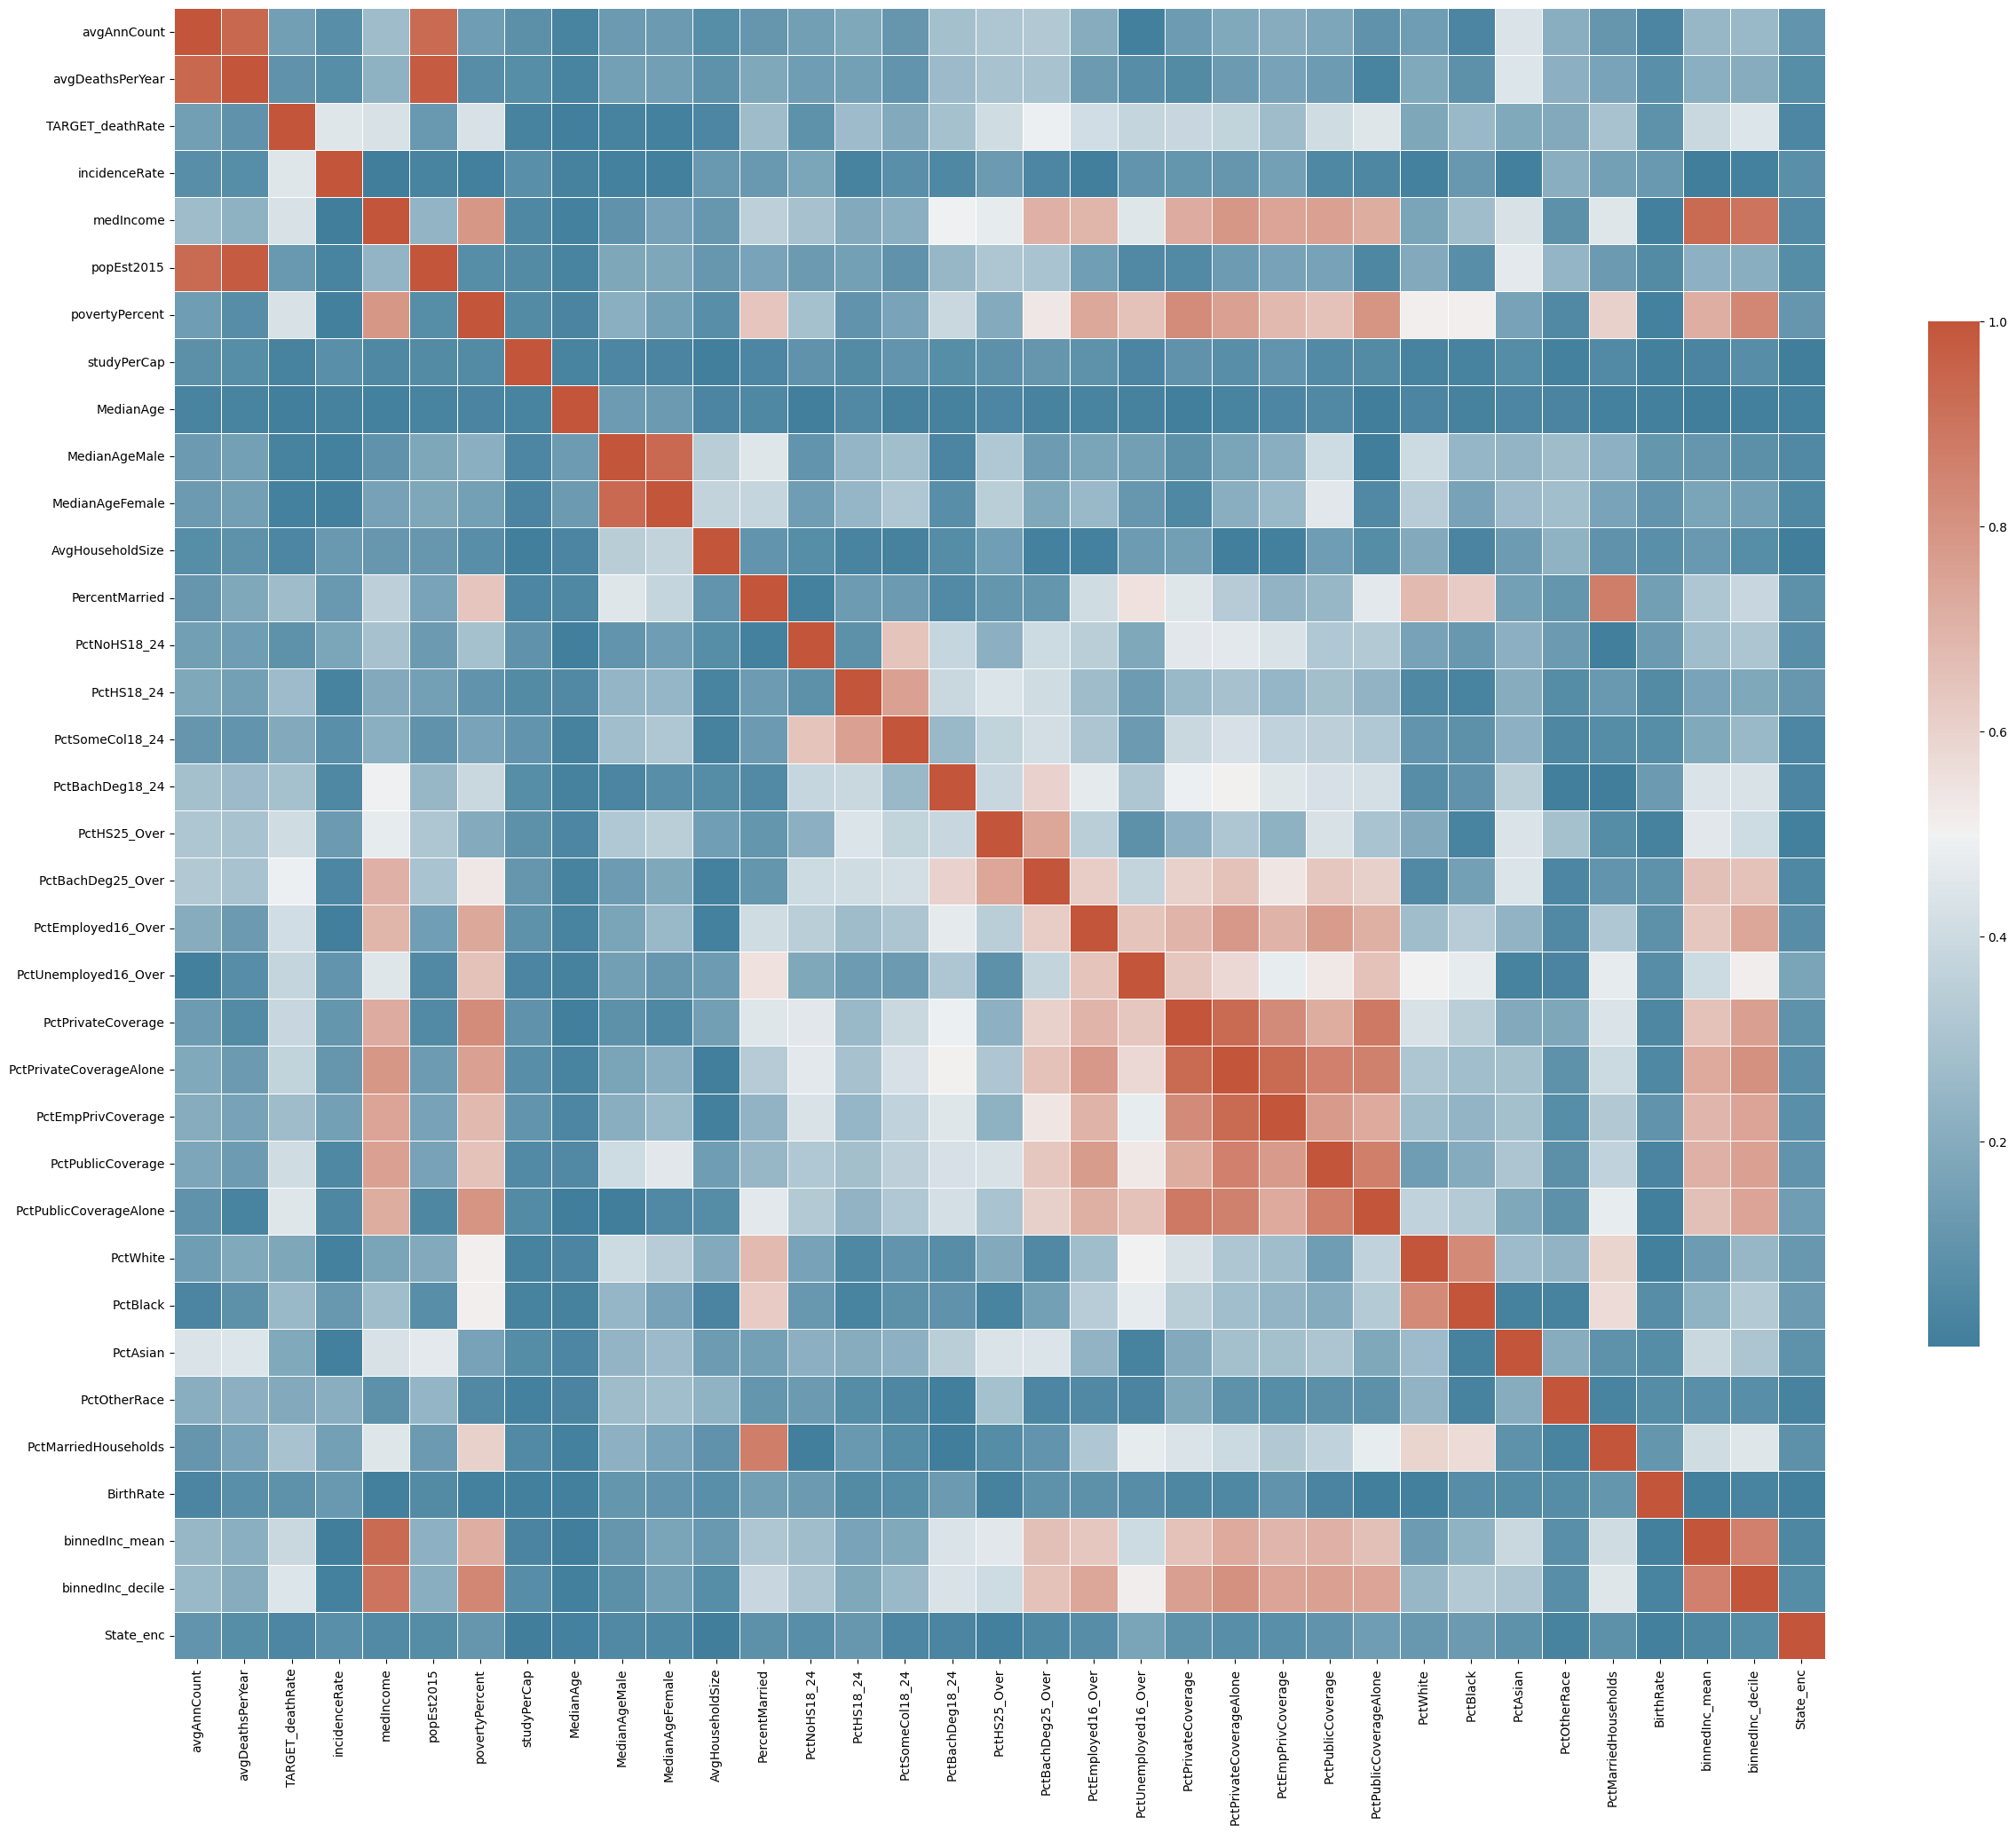

In [24]:
corr = np.abs(data.corr())
fig, ax = plt.subplots(figsize= (30,30))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
# Correlation between target with other features
corr = np.abs(data.corr())
corr['TARGET_deathRate']

<ipython-input-25-1b06c44253c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.abs(data.corr())


avgAnnCount                0.143532
avgDeathsPerYear           0.090715
TARGET_deathRate           1.000000
incidenceRate              0.449432
medIncome                  0.428615
popEst2015                 0.120073
povertyPercent             0.429389
studyPerCap                0.022285
MedianAge                  0.004375
MedianAgeMale              0.021929
MedianAgeFemale            0.012048
AvgHouseholdSize           0.036905
PercentMarried             0.266820
PctNoHS18_24               0.088463
PctHS18_24                 0.261976
PctSomeCol18_24            0.188688
PctBachDeg18_24            0.287817
PctHS25_Over               0.404589
PctBachDeg25_Over          0.485477
PctEmployed16_Over         0.412046
PctUnemployed16_Over       0.378412
PctPrivateCoverage         0.386066
PctPrivateCoverageAlone    0.363704
PctEmpPrivCoverage         0.267399
PctPublicCoverage          0.404572
PctPublicCoverageAlone     0.449358
PctWhite                   0.177400
PctBlack                   0

## Handling missing data 

Because the loss PctSomeCol18_24 attribute is so large by about 75%, we decided not to include it in the model

In [26]:
data = data.drop('PctSomeCol18_24', axis=1)

Before choosing the optimal method, we will test on many ways

In [27]:
X_t = data.copy()

Fill missing value of 'PctPrivateCoverageAlone' by mean of State

In [28]:
# Create dictionary to mapping missing values in PctPrivateCoverageAlone by mean group by State
dic_map = X_t[['State', 'PctPrivateCoverageAlone']].groupby(by= ['State']).mean().to_dict()['PctPrivateCoverageAlone']
dic_map

{'Alabama': 45.13653846153846,
 'Alaska': 44.48125,
 'Arizona': 36.853846153846156,
 'Arkansas': 39.644067796610166,
 'California': 45.84102564102564,
 'Colorado': 50.18936170212766,
 'Connecticut': 60.63333333333333,
 'Delaware': 50.86666666666667,
 'District of Columbia': 55.6,
 'Florida': 41.337037037037035,
 'Georgia': 43.150769230769235,
 'Hawaii': 56.0,
 'Idaho': 46.87777777777777,
 'Illinois': 52.25,
 'Indiana': 54.482716049382724,
 'Iowa': 55.73544303797469,
 'Kansas': 54.65301204819277,
 'Kentucky': 45.25473684210526,
 'Louisiana': 43.449090909090906,
 'Maine': 44.791666666666664,
 'Maryland': 56.25217391304348,
 'Massachusetts': 58.1,
 'Michigan': 47.77460317460318,
 'Minnesota': 55.7171875,
 'Mississippi': 39.50135135135135,
 'Missouri': 47.084883720930236,
 'Montana': 47.02142857142857,
 'Nebraska': 56.4359375,
 'Nevada': 49.53333333333333,
 'New Hampshire': 56.1625,
 'New Jersey': 58.495000000000005,
 'New Mexico': 35.328,
 'New York': 53.97708333333333,
 'North Carolina':

In [29]:
# Let's fill missing values in PctPrivateCoverageAlone
X_t['PctPrivateCoverageAlone'] = X_t.PctPrivateCoverageAlone.fillna(X_t.State.map(dic_map))

Fill missing values of 'PctPrivateCoverageAlone' by mean State

In [30]:
# Create dictionary to mapping missing values in PctEmployed16_Over by mean group by State
dic_map = X_t[['State', 'PctEmployed16_Over']].groupby(by= ['State']).mean().to_dict()['PctEmployed16_Over']
X_t['PctEmployed16_Over'] = X_t.PctPrivateCoverageAlone.fillna(X_t.State.map(dic_map))

Let's see if any columns have missing data?

In [31]:
# Calculate percentage of missing values ​​for each features and total missing values ​​for all features
missing_data = pd.DataFrame({
    'Number missing': X_t.isna().sum(),
    'Percent %': (X_t.isna().sum() * 100 / len(X_t))
})
missing_data.sort_values(by='Percent %', ascending=False, inplace=True)

missing_data_total = pd.DataFrame({
    'Number missing': X_t.isna().sum(),
    'Percent %': (X_t.isna().sum() * 100 / X_t.size)
})

print(missing_data_total.sum())
print(missing_data.head(3))

Number missing    0.0
Percent %         0.0
dtype: float64
                      Number missing  Percent %
avgAnnCount                        0        0.0
PctBlack                           0        0.0
PctUnemployed16_Over               0        0.0


### **Compare performance** Imputed missing values


In [32]:
for i in ['mean', 'median', 'most_frequent', 'constant']:

  X_o = data[['PctPrivateCoverageAlone','PctEmployed16_Over']]
  y_o = data['TARGET_deathRate']

  imputer_ = SimpleImputer(missing_values=np.nan, strategy=i)
  X_o = pd.DataFrame(imputer_.fit_transform(X_o),columns= X_o.columns)

  X_o_train, X_o_test, y_o_train, y_o_test = train_test_split(X_o, y_o, train_size= 0.85)
  ln1 = LinearRegression()
  ln1.fit(X_o_train,y_o_train)
  print('Score with '+i+ ' data:', ln1.score(X_o_test,y_o_test))

# With mean by State
X_train, X_test, y_train, y_test = train_test_split(X_t[['PctPrivateCoverageAlone','PctEmployed16_Over']], X_t.TARGET_deathRate, train_size= 0.85)
ln2 = LinearRegression()
ln2.fit(X_train,y_train)
print('Score with mean by State data:', ln2.score(X_test,y_test))

# With KNNInputer
X = data[['PctPrivateCoverageAlone','PctEmployed16_Over']]
y = data['TARGET_deathRate']

imputer = KNNImputer(n_neighbors=2, weights="distance")
X = pd.DataFrame(imputer.fit_transform(X), columns= X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.85)
ln3 = LinearRegression()
ln3.fit(X_train,y_train)
print('Score with KNNImputer data:', ln3.score(X_test,y_test))


Score with mean data: 0.19188857528646308
Score with median data: 0.12120685491727567
Score with most_frequent data: 0.2286249772943103
Score with constant data: 0.02168070740649508
Score with mean by State data: 0.10317110204674551
Score with KNNImputer data: 0.14695218450938308


Through many run test, we found that KNNInputer always gives better results than other methods, so we will choose KNNInputer to handle missing values

In [33]:
data_drop = data.drop(labels= ['Geography', 'binnedInc', 'County', 'State'], axis= 1)
data_cate = data[['Geography', 'binnedInc', 'County', 'State']]
imputer = KNNImputer(n_neighbors=2, weights="distance")
data= pd.DataFrame(imputer.fit_transform(data_drop), columns= data_drop.columns)
data = pd.concat((data, data_cate), axis= 1)
data.head(5)

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0             469.0             164.9          489.8    61898.0   
1        173.0              70.0             161.3          411.6    48127.0   
2        102.0              50.0             174.7          349.7    49348.0   
3        427.0             202.0             194.8          430.4    44243.0   
4         57.0              26.0             144.4          350.1    49955.0   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0    260131.0            11.2   499.748204       39.3           36.9  ...   
1     43269.0            18.6    23.111234       33.0           32.2  ...   
2     21026.0            14.6    47.560164       45.0           44.0  ...   
3     75882.0            17.1   342.637253       42.8           42.2  ...   
4     10321.0            12.5     0.000000       48.3           47.8  ...   

   PctOtherRace  PctMarriedHouseholds  BirthRate  binnedInc_mean  \
0      1.843479             52.856076   6.118831        93564.75   
1      3.741352             45.372500   4.333096        49534.00   
2      2.747358             54.444868   3.729488        49534.00   
3      1.362643             51.021514   4.603841        43962.70   
4      0.492135             54.027460   6.796657        49534.00   

   binnedInc_decile  State_enc                     Geography  \
0              10.0       47.0     Kitsap County, Washington   
1               7.0       47.0   Kittitas County, Washington   
2               7.0       47.0  Klickitat County, Washington   
3               5.0       47.0      Lewis County, Washington   
4               7.0       47.0    Lincoln County, Washington   

            binnedInc            County       State  
0   (61494.5, 125635]     Kitsap County  Washington  
1  (48021.6, 51046.4]   Kittitas County  Washington  
2  (48021.6, 51046.4]  Klickitat County  Washington  
3    (42724.4, 45201]      Lewis County  Washington  
4  (48021.6, 51046.4]    Lincoln County  Washington  

[5 rows x 38 columns]

In [34]:
data.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
binnedInc_mean             0
binnedInc_decile           0
State_enc                  0
Geography     

Now we will drop 'Geography', 'binnedInc', 'County', 'State'

In [35]:
data_FE = data.drop(labels= ['Geography', 'binnedInc', 'County', 'State'], axis= 1)

In [36]:
data_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   float64
 5   popEst2015               3047 non-null   float64
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  AvgHouseholdSize         3047 non-null   float64
 12  PercentMarried           3047 non-null   float64
 13  PctNoHS18_24             3047 non-null   float64
 14  PctHS18_24              

## Feature selection

### Using threshold by correlation matrix to choose important feature

In [37]:
# We try to find the features that have high correlation with any each other (no include target variable)
cols = data_FE.drop(labels='TARGET_deathRate', axis=1).columns.tolist()
cols_fn = cols.copy()
for i in range(len(cols)-1):
  for j in range(i+1,len(cols),1):
    score = data_FE[cols[i]].corr(data_FE[cols[j]])
    if abs(score) >= 0.8:
      try:
        cols_fn.remove(cols[i])
      except:
        pass

print(len(cols_fn))
print(cols_fn)
cols_fn.append('TARGET_deathRate')

22
['incidenceRate', 'popEst2015', 'studyPerCap', 'MedianAge', 'MedianAgeFemale', 'AvgHouseholdSize', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctEmpPrivCoverage', 'PctPublicCoverageAlone', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'binnedInc_decile', 'State_enc']


Let's use corelation matrix to see relation of features



In [38]:
# Correlation between target with other features
corr = data_FE[cols_fn].corr()
corr['TARGET_deathRate']

incidenceRate             0.449432
popEst2015               -0.120073
studyPerCap              -0.022285
MedianAge                 0.004375
MedianAgeFemale           0.012048
AvgHouseholdSize         -0.036905
PctNoHS18_24              0.088463
PctHS18_24                0.261976
PctBachDeg18_24          -0.287817
PctHS25_Over              0.404589
PctBachDeg25_Over        -0.485477
PctEmployed16_Over       -0.411772
PctUnemployed16_Over      0.378412
PctEmpPrivCoverage       -0.267399
PctPublicCoverageAlone    0.449358
PctBlack                  0.257024
PctAsian                 -0.186331
PctOtherRace             -0.189894
PctMarriedHouseholds     -0.293325
BirthRate                -0.087407
binnedInc_decile         -0.444574
State_enc                -0.036410
TARGET_deathRate          1.000000
Name: TARGET_deathRate, dtype: float64

<ipython-input-39-3f38b6e90a63>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(abs(corr), mask=np.zeros_like(abs(corr), dtype=np.bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),


<Axes: >

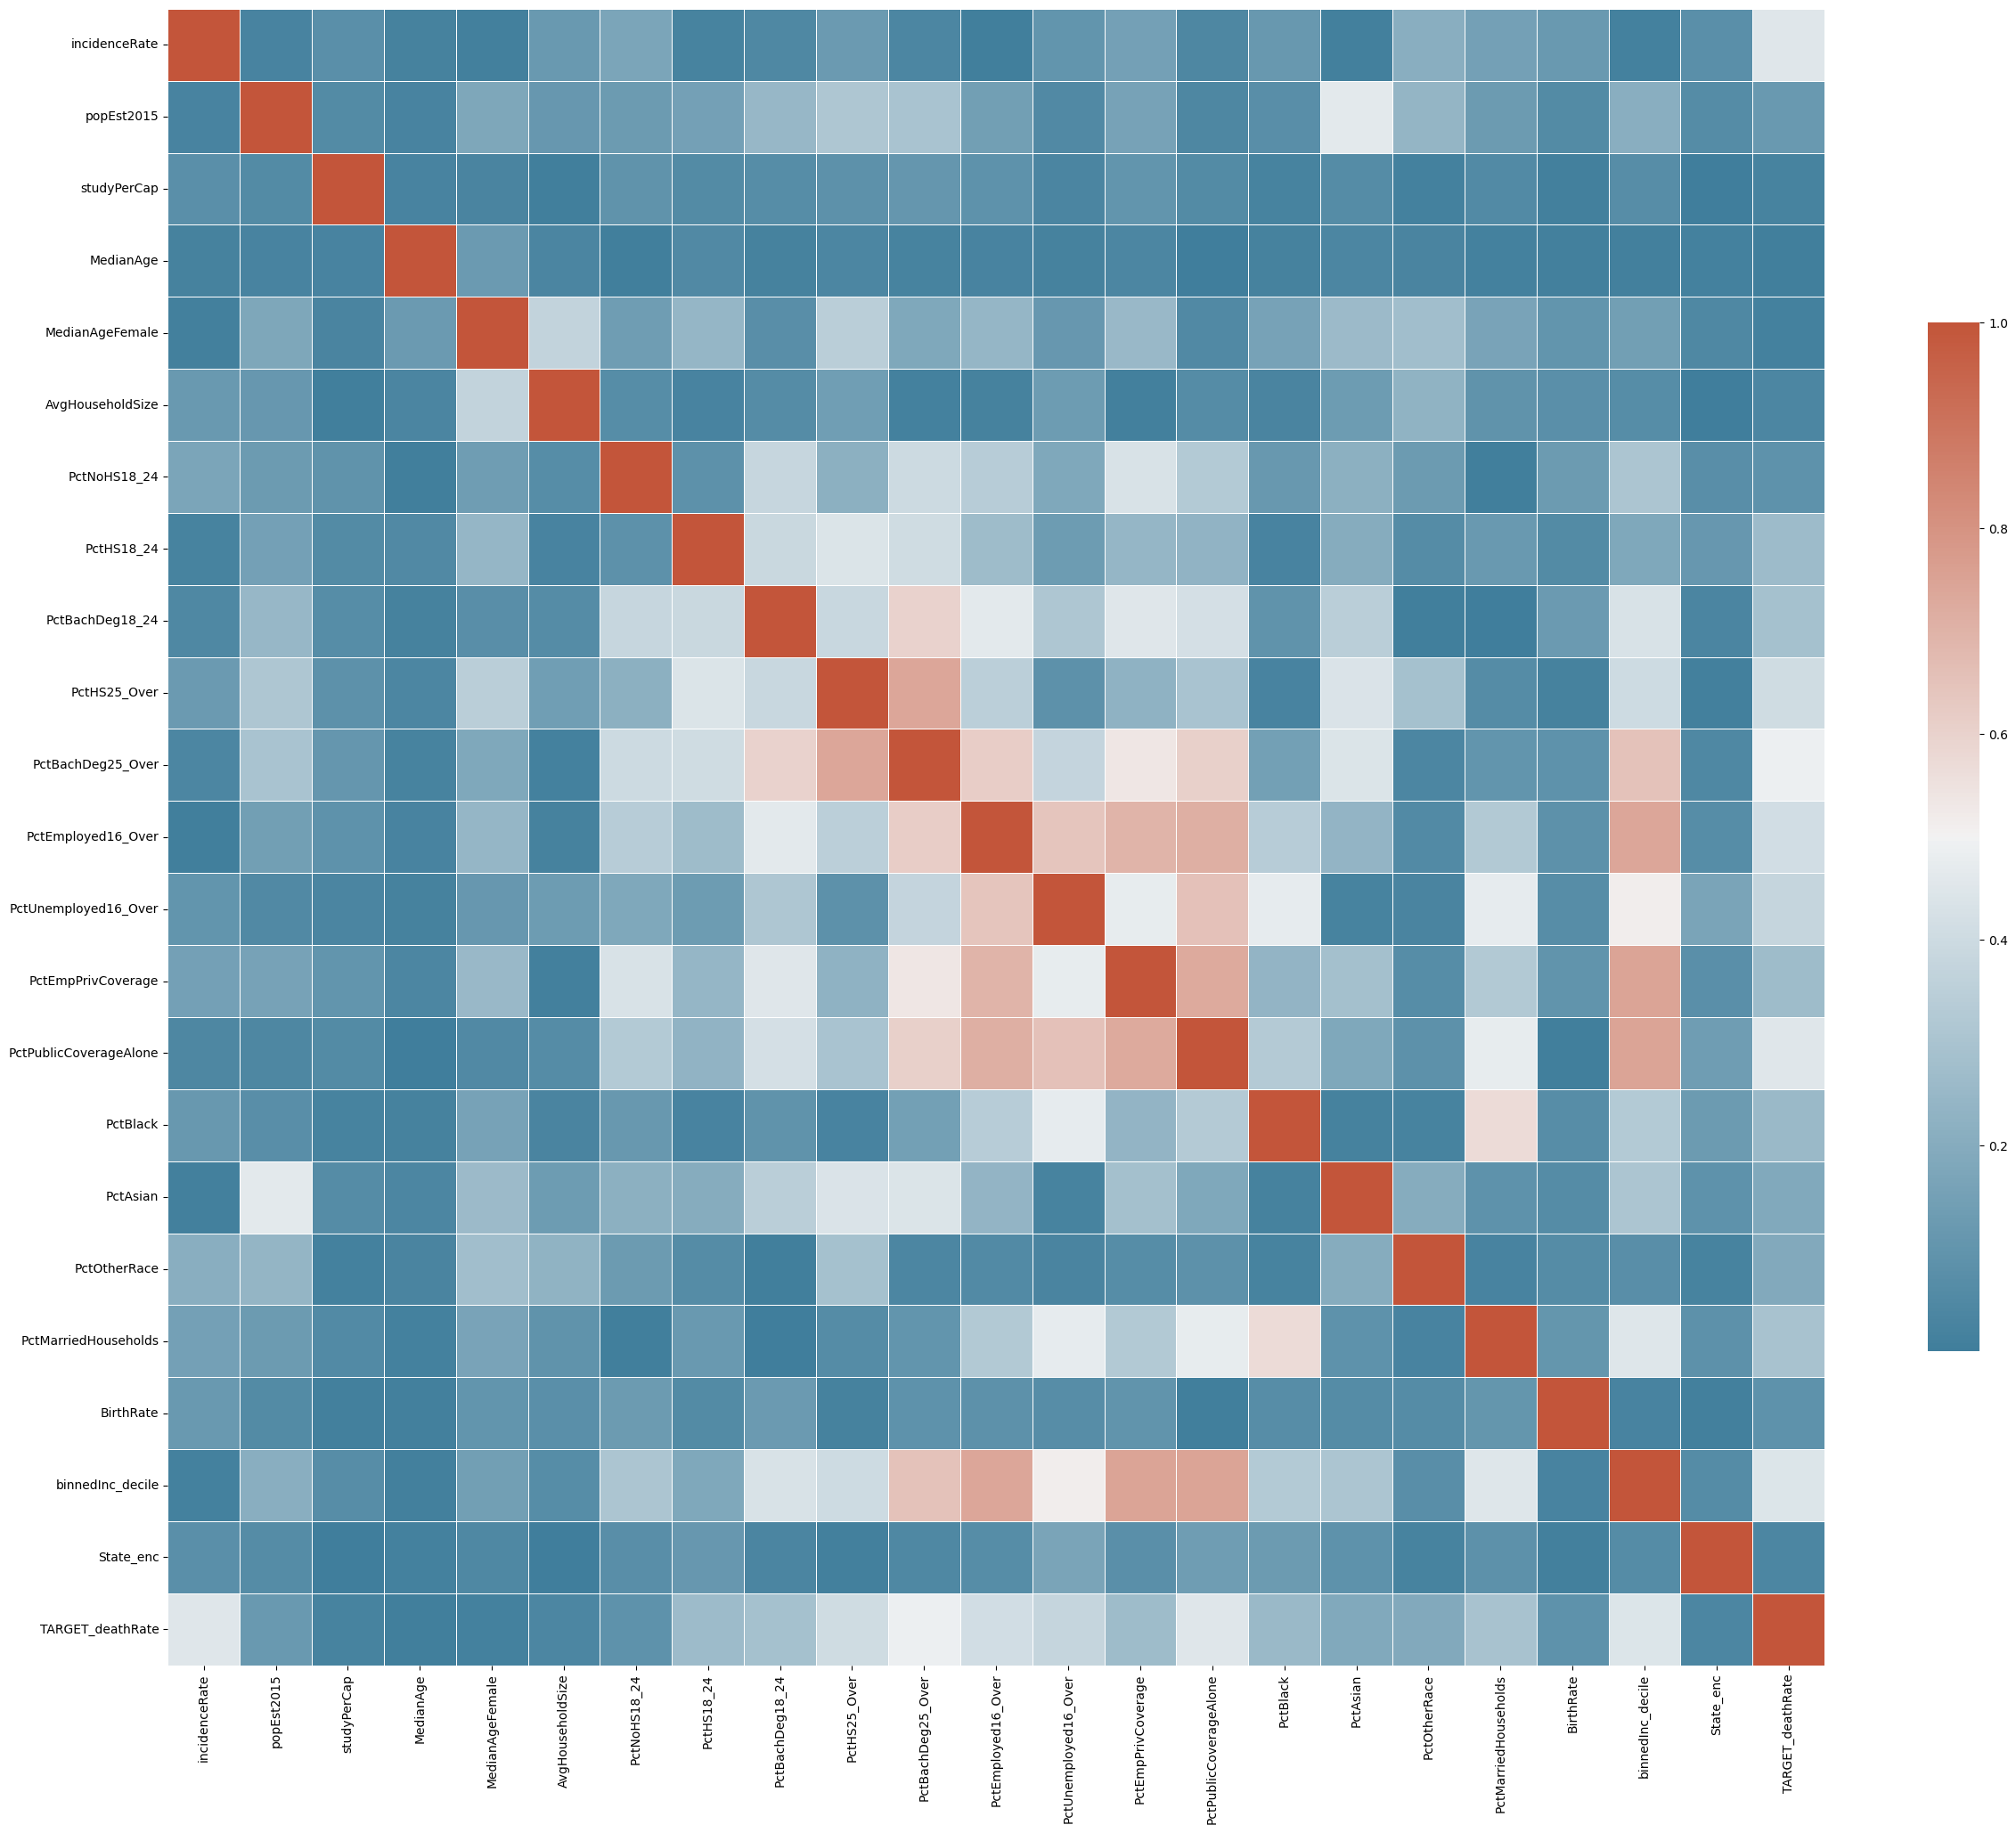

In [39]:
fig, ax = plt.subplots(figsize= (30,30))
sns.heatmap(abs(corr), mask=np.zeros_like(abs(corr), dtype=np.bool), cmap=sns.diverging_palette(230, 20, as_cmap=True),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [40]:
# Find out features have correlation with target variable 'TARGET_deathRate'
# Choose threshold = 0.2 that mean choose correlation features with 'TARGET_deathRate'
df_ = pd.DataFrame(corr.round(2).loc['TARGET_deathRate'])
pos_corr = df_.loc[df_.TARGET_deathRate >= 0.2] # Positive correlation
neg_corr = df_.loc[df_.TARGET_deathRate <= -0.2] # Negative correlation
result = pd.concat([pos_corr, neg_corr])
print(result)
corr_features = result.index.to_list()
print('Features have correlation with TARGET_deathRate:\n', corr_features)
print(len(corr_features))

                        TARGET_deathRate
incidenceRate                       0.45
PctHS18_24                          0.26
PctHS25_Over                        0.40
PctUnemployed16_Over                0.38
PctPublicCoverageAlone              0.45
PctBlack                            0.26
TARGET_deathRate                    1.00
PctBachDeg18_24                    -0.29
PctBachDeg25_Over                  -0.49
PctEmployed16_Over                 -0.41
PctEmpPrivCoverage                 -0.27
PctMarriedHouseholds               -0.29
binnedInc_decile                   -0.44
Features have correlation with TARGET_deathRate:
 ['incidenceRate', 'PctHS18_24', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverageAlone', 'PctBlack', 'TARGET_deathRate', 'PctBachDeg18_24', 'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctEmpPrivCoverage', 'PctMarriedHouseholds', 'binnedInc_decile']
13


### Using GradientBoosting to choose important feature

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_FE.drop(labels='TARGET_deathRate', axis=1), data_FE['TARGET_deathRate'])

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
feature_importances = gb_model.feature_importances_

GrB_features = []
#Print important score of each feature
for feature, importance in enumerate(feature_importances):
  if importance >= 0.02:
    GrB_features.append(data_FE.columns[feature])
    print(f"Feature: {data_FE.columns[feature]}: {importance}")

Feature: avgAnnCount: 0.033080026321142805
Feature: avgDeathsPerYear: 0.05650558923187787
Feature: TARGET_deathRate: 0.2696205397541116
Feature: incidenceRate: 0.04635261141792585
Feature: medIncome: 0.039481321506387605
Feature: popEst2015: 0.06504921007716777
Feature: PctBachDeg18_24: 0.05910520560999497
Feature: PctHS25_Over: 0.1952249281413078
Feature: PctUnemployed16_Over: 0.025792584501513036
Feature: PctPublicCoverage: 0.0267074785332297
Feature: PctWhite: 0.021585058718421493
Feature: PctAsian: 0.022047102304403526


After running many tests to evaluate the performance of the predictive models, we found that the accuracy of this method is significantly lower than that of using threshold by correlation matrix.
+ We decided to use the threshold according to the correlation matrix for feature selection

In [42]:
data_FE_important = data_FE[corr_features]
# data_FE_important = data_FE[GrB_features]
data_FE_important

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0        489.800000        39.5          23.2                   8.0   
1        411.600000        22.4          26.0                   7.8   
2        349.700000        36.6          29.0                   7.0   
3        430.400000        41.2          31.6                  12.1   
4        350.100000        43.0          33.4                   4.8   
...             ...         ...           ...                   ...   
3042     453.549422        27.9          32.2                   4.3   
3043     453.549422        33.9          23.1                   4.6   
3044     453.549422        44.5          23.0                   6.4   
3045     453.549422        37.2          36.1                   6.9   
3046     453.549422        43.3          29.8                   9.2   

      PctPublicCoverageAlone   PctBlack  TARGET_deathRate  PctBachDeg18_24  \
0                       14.0   2.594728             164.9              6.9   
1                       15.3   0.969102             161.3              7.5   
2                       21.1   0.739673             174.7              9.5   
3                       25.0   0.782626             194.8              2.5   
4                       22.7   0.270192             144.4              2.0   
...                      ...        ...               ...              ...   
3042                    13.2   3.837754             149.6              8.4   
3043                    17.7   2.326771             150.1              3.8   
3044                    16.8   2.313188             153.9              2.5   
3045                    14.0   1.176562             175.0              4.1   
3046                    12.6  16.590100             213.6              4.8   

      PctBachDeg25_Over  PctEmployed16_Over  PctEmpPrivCoverage  \
0                  19.6           51.900000                41.6   
1                  22.7           55.900000                43.6   
2                  16.0           45.900000                34.9   
3                   9.3           48.300000                35.0   
4                  15.0           48.200000                35.1   
...                 ...                 ...                 ...   
3042               15.2           51.700000                44.6   
3043               12.4           70.100000                48.6   
3044               12.8           64.800000                47.8   
3045               14.4           60.387353                49.6   
3046               13.7           48.800000                22.9   

      PctMarriedHouseholds  binnedInc_decile  
0                52.856076              10.0  
1                45.372500               7.0  
2                54.444868               7.0  
3                51.021514               5.0  
4                54.027460               7.0  
...                    ...               ...  
3042             51.063830               6.0  
3043             52.007937               7.0  
3044             55.153949               8.0  
3045             58.484232               7.0  
3046             56.040242               4.0  

[3047 rows x 13 columns]

## Outlier Processing

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


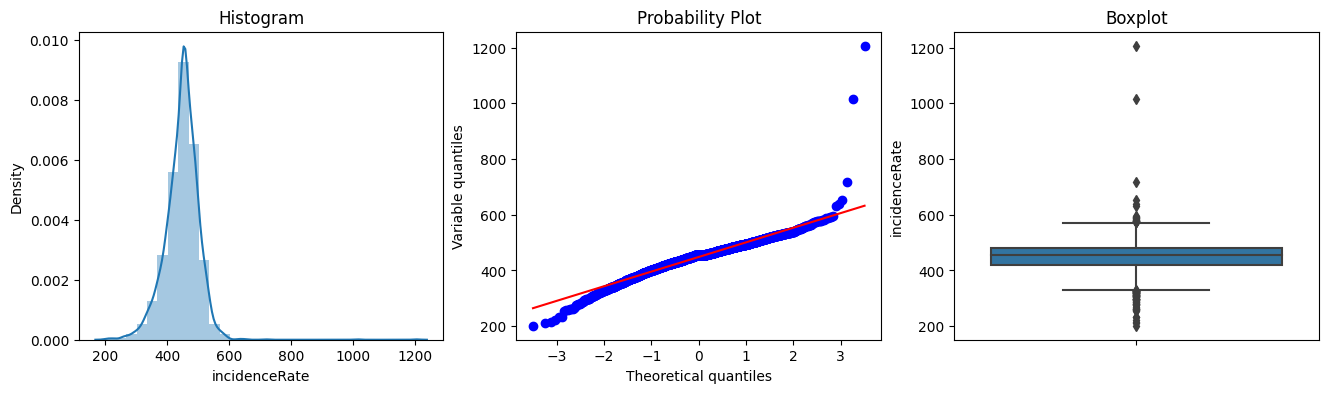

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


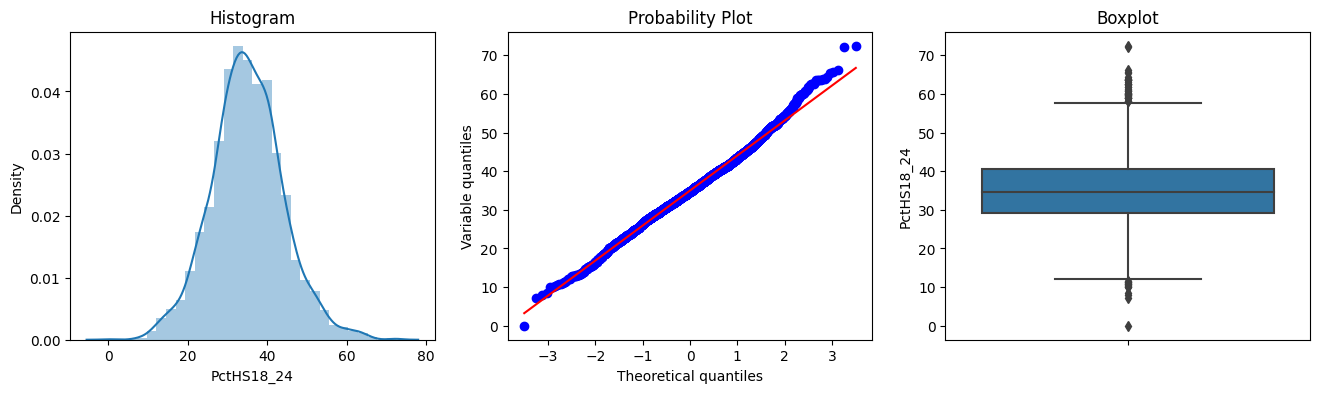

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


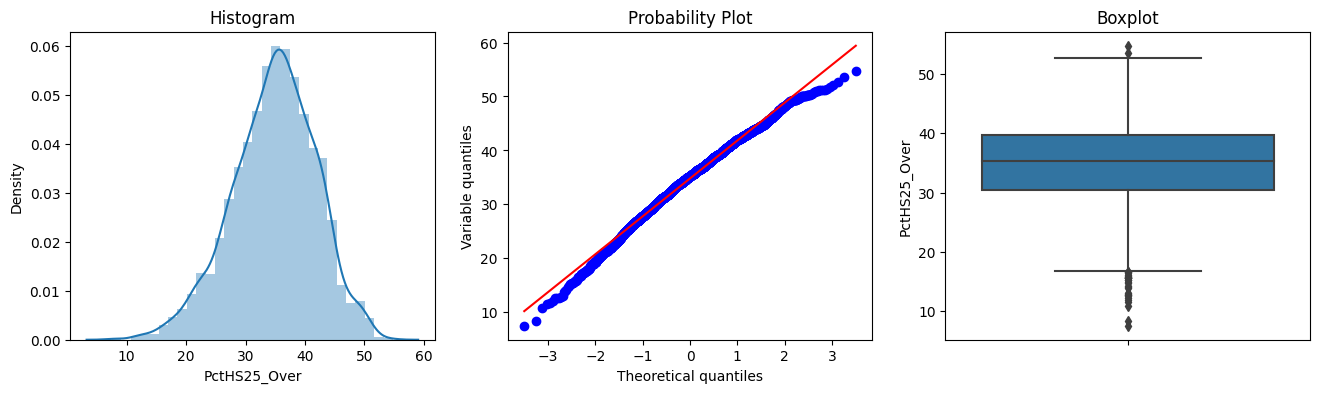

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


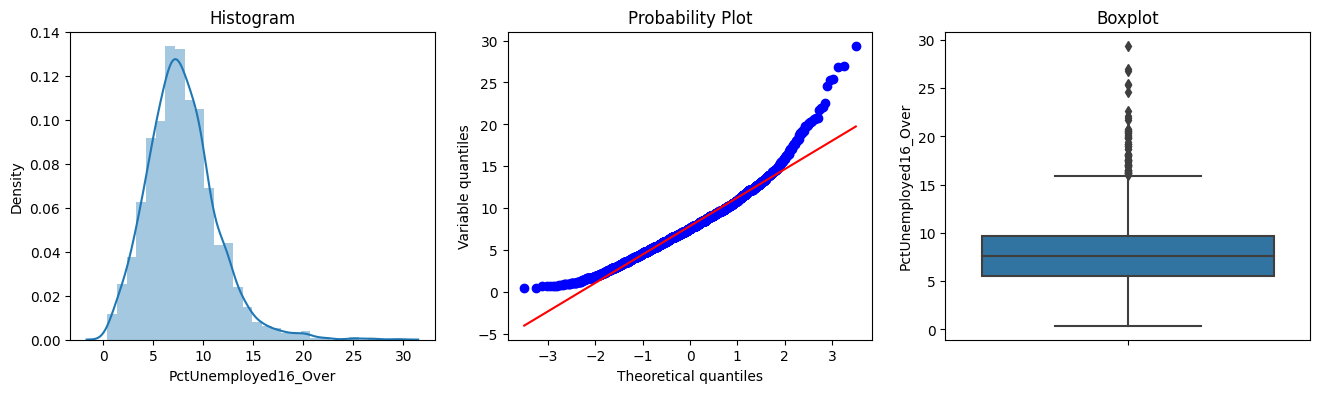

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


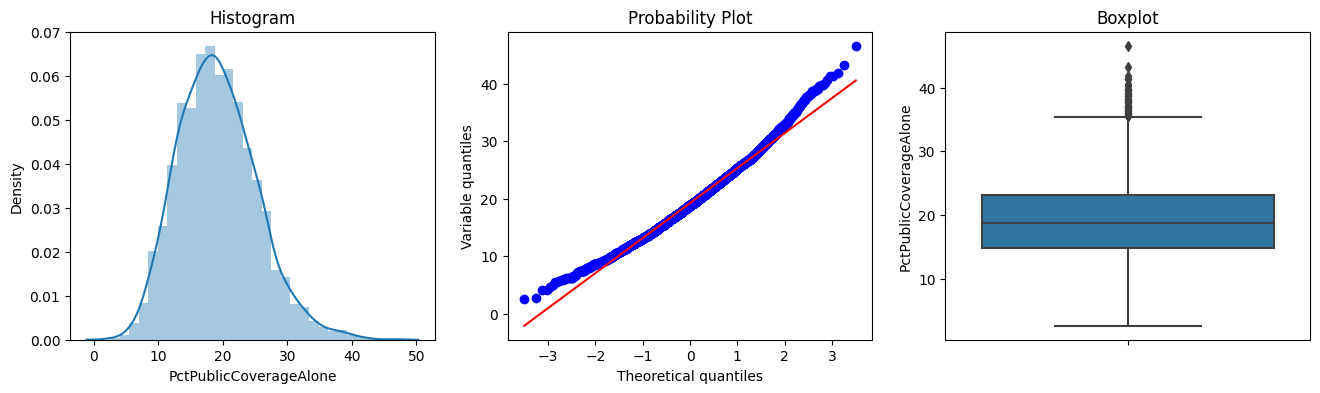

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


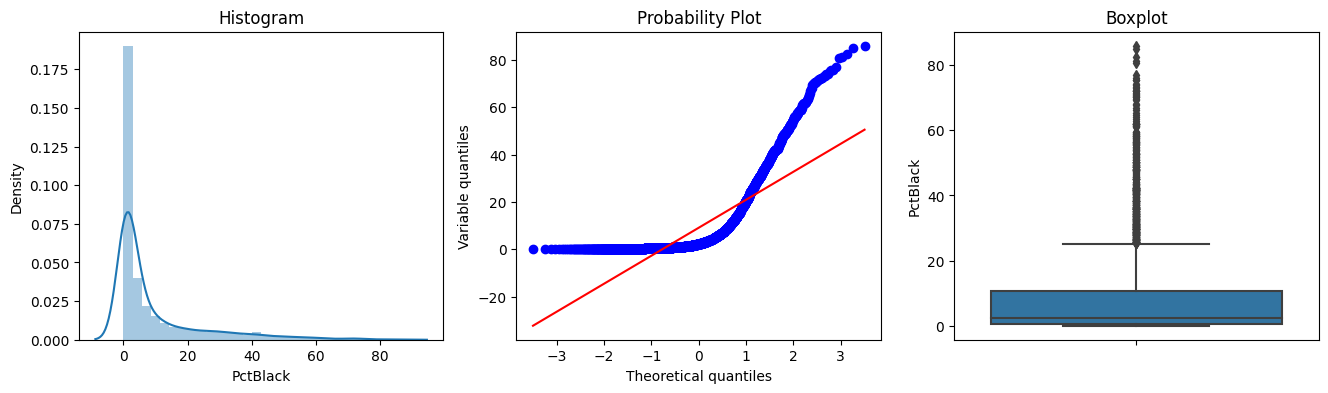

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


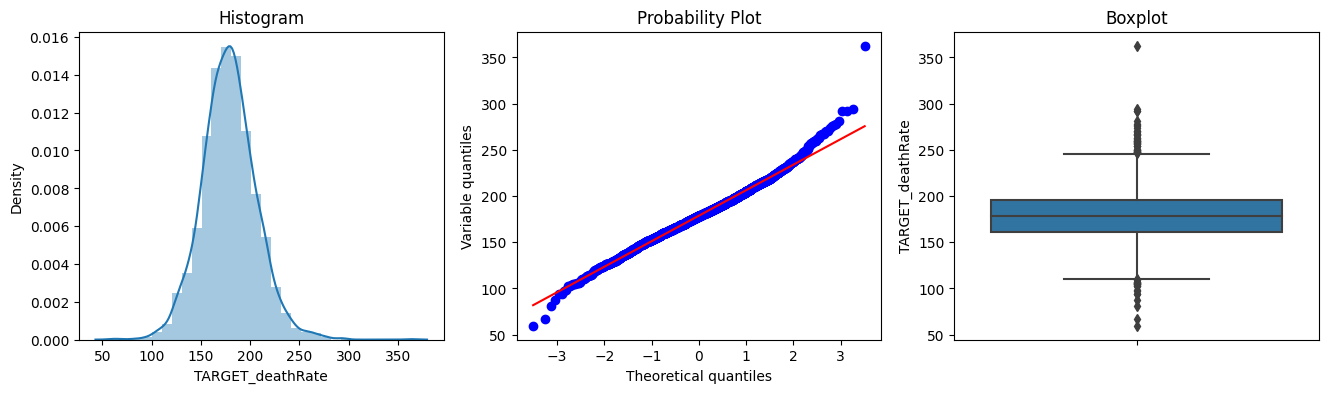

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


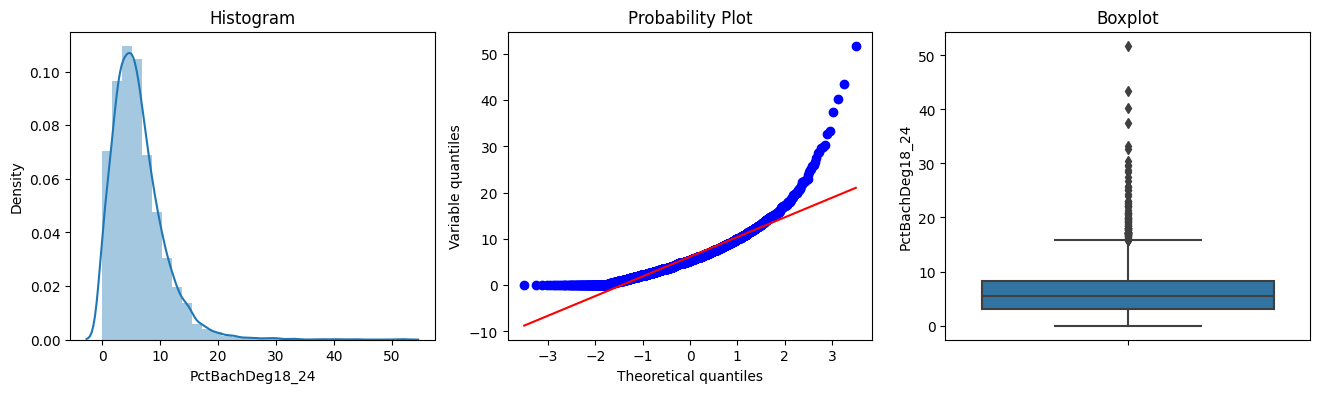

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


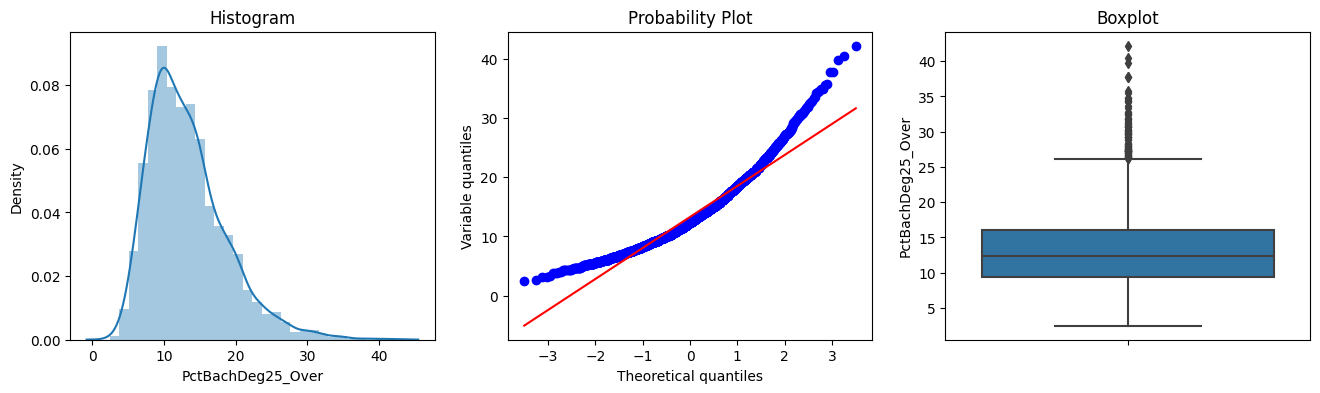

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


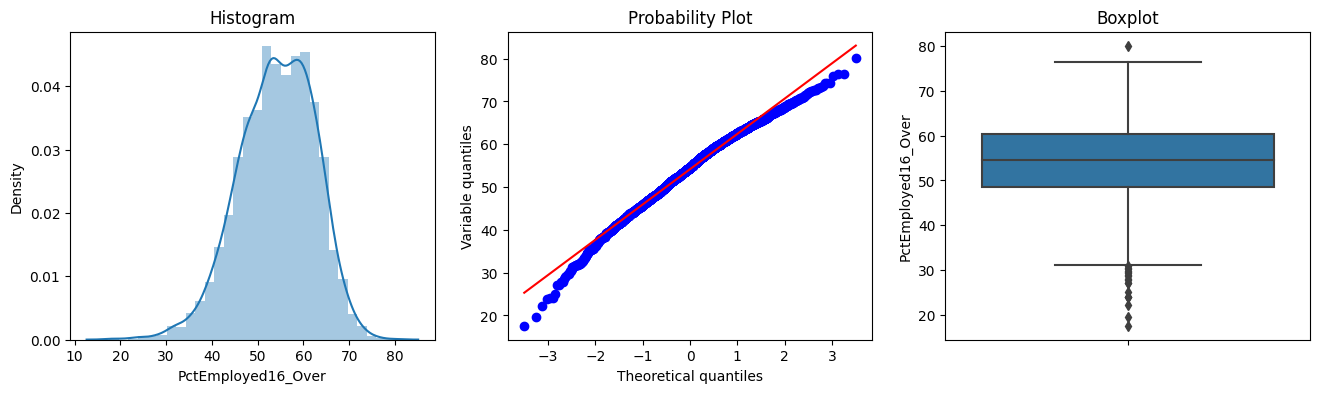

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


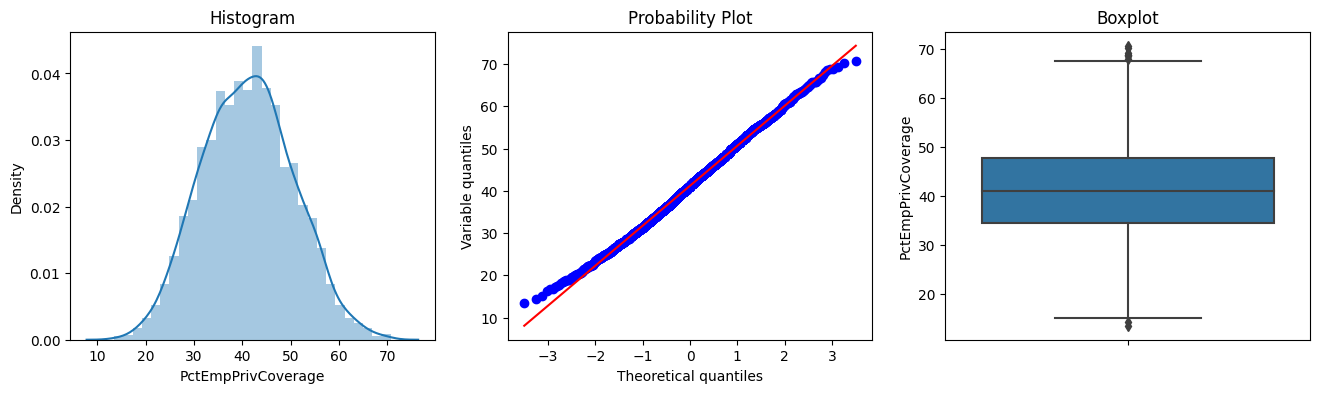

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


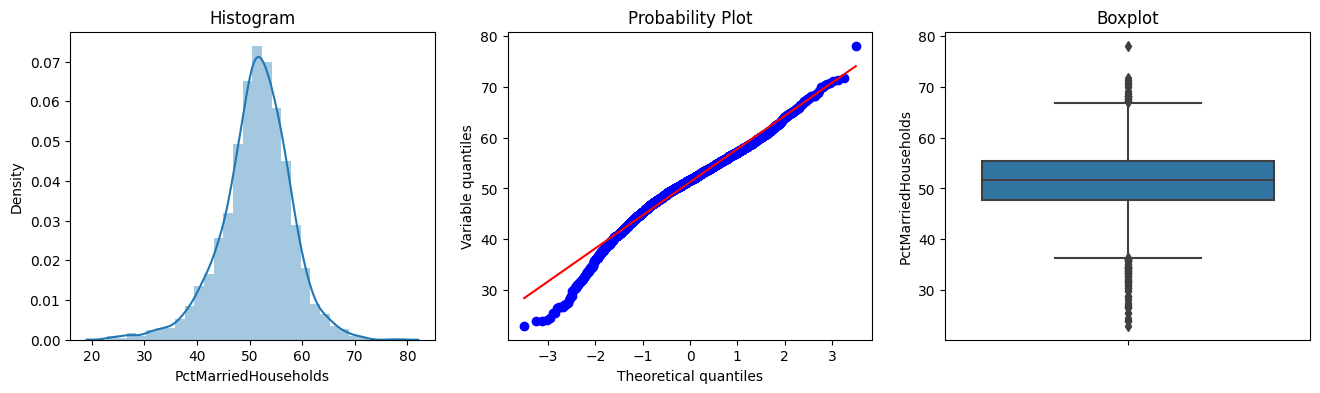

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


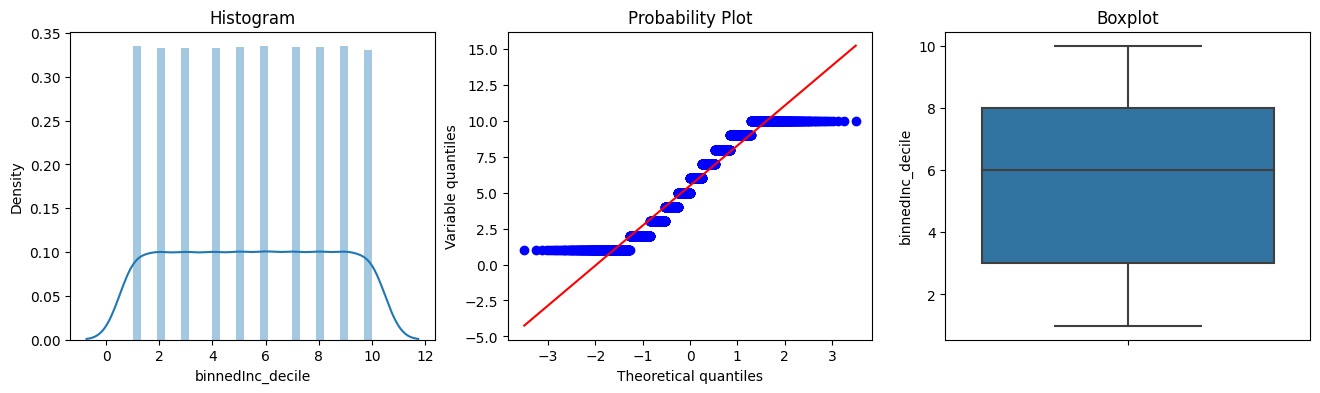

In [43]:
#Visualize distribution of each column and find outliers
for col in data_FE_important.columns:
  diagnostic_plots(data_FE_important, col)

In [44]:
# Include outlier with LinearRegression
train, test = train_test_split(data_FE_important, train_size= 0.8)
X_train, y_train = train.drop(labels='TARGET_deathRate', axis=1), train['TARGET_deathRate']
X_test, y_test = test.drop(labels='TARGET_deathRate', axis=1), test['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 412.10617309503465
Score: 0.5083021704134688


In [45]:
# Ignore outlier
train_noOutlier = 0
test_noOutlier = 0
data_nonOutlier=pd.DataFrame()
for col in data_FE_important.columns:
  lower_bound = data_FE_important[col].quantile(0)
  upper_bound = data_FE_important[col].quantile(1)
  train_noOutlier = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]
  test_noOutlier = test[(test[col] >= lower_bound) & (test[col] <= upper_bound)]

len(train_noOutlier) + len(test_noOutlier)

3047

In [46]:
data_FE_nonOutlier = pd.concat([train_noOutlier, test_noOutlier], ignore_index=True)
data_FE_nonOutlier.to_csv('data_FE_nonOutlier.csv', index=False)
train_noOutlier.to_csv('train.csv', index=False)
test_noOutlier.to_csv('test.csv', index=False)

In [47]:
# Ignore outlier with LinearRegression
X_train, y_train = train_noOutlier.drop(labels='TARGET_deathRate', axis=1), train_noOutlier['TARGET_deathRate']
X_test, y_test = test_noOutlier.drop(labels='TARGET_deathRate', axis=1), test_noOutlier['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 412.10617309503465
Score: 0.5083021704134688


After outlier processing, we compare performance of include oulier and ignore outlier in base model -> Then, include outlier have better performance so that, we evaluate outlier in current dataset out of quantile is not really outliers because of not enough large samples data

## Standard Scaler

Standard scaler for feature non-category
 Data after Feature Engineer & Feature Selection include 20 columns and only binnedInc_mean & binnedInc_decile is category feature

In [48]:
final_train = pd.read_csv('train.csv')
final_test = pd.read_csv('test.csv')

len(final_train) + len(final_test)

3047

In [49]:
sd_scale_train = final_train.drop(labels=['TARGET_deathRate'], axis=1)
sd_scale_test = final_test.drop(labels=['TARGET_deathRate'], axis=1)

SS = StandardScaler()
SS.fit(sd_scale_train)
cols = sd_scale_train.columns
sd_scale_train = pd.DataFrame(SS.transform(sd_scale_train), columns=cols)
sd_scale_test = pd.DataFrame(SS.transform(sd_scale_test), columns=cols)

sd_scale_train.head(5)

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0       0.049995   -0.224224     -1.060404             -0.810200   
1       1.123733   -0.290272     -0.068265              0.625109   
2       0.992255    0.612395      1.211450              0.068560   
3      -1.339657   -0.323297      0.406236             -0.195068   
4       0.579560   -1.391086      0.449372             -1.688961   

   PctPublicCoverageAlone  PctBlack  PctBachDeg18_24  PctBachDeg25_Over  \
0               -0.967347 -0.549608        -0.169630           0.237367   
1                1.477093 -0.594025        -0.214425          -0.609054   
2               -0.278310 -0.541875         0.345509          -0.383342   
3                0.033397  1.095635        -1.155114          -0.834766   
4               -1.065781 -0.601195         1.241404           0.274985   

   PctEmployed16_Over  PctEmpPrivCoverage  PctMarriedHouseholds  \
0            1.417019            0.957879             -0.637344   
1           -0.681315           -0.544455             -0.617225   
2            0.197057            0.196132              0.062253   
3           -1.376694           -0.660833             -0.833588   
4            1.148627            0.746283              0.502159   

   binnedInc_decile  
0          1.227090  
1         -0.864599  
2          0.529860  
3         -1.213214  
4          0.878475

In [50]:
sd_scale_test.head(5)

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0      -0.547135    1.151793     -0.528388             -0.282944   
1       1.567472    0.326183      0.967010              0.478649   
2      -0.112527    0.920623     -1.649936             -0.195068   
3       1.392168    2.032444      1.139556             -1.278873   
4       0.427995    0.568362      2.217967             -0.195068   

   PctPublicCoverageAlone  PctBlack  PctBachDeg18_24  PctBachDeg25_Over  \
0               -0.147065 -0.584079         0.166331           0.820457   
1                0.066208 -0.402429         0.143933          -0.289295   
2               -0.409555  0.667151         0.390304           1.854971   
3               -0.540800 -0.627137        -0.863948           0.519507   
4               -0.540800 -0.428585         0.390304          -0.721910   

   PctEmployed16_Over  PctEmpPrivCoverage  PctMarriedHouseholds  \
0            1.148627            1.201215             -0.071647   
1            0.172658            0.428888             -0.102309   
2           -0.473922           -1.073445              0.433679   
3            0.270255           -1.136924              0.959217   
4           -0.168931            0.566426             -0.505499   

   binnedInc_decile  
0          1.575705  
1          0.181245  
2          1.227090  
3         -1.213214  
4         -0.515984

In [51]:
# Try again with LinearRegression
X_train, y_train = sd_scale_train, final_train['TARGET_deathRate']
X_test, y_test = sd_scale_test, final_test['TARGET_deathRate']

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 412.1061730950348
Score: 0.5083021704134686


In [52]:
# # Compare data distribution before and after standard scaler
# diagnostic_plots(data, "PctBlack")
# data_scale = pd.concat((sd_scale_train, sd_scale_test), axis= 0)
# diagnostic_plots(data_scale, "PctBlack")

In [53]:
# # Compare data distribution before and after root sware
# data = pd.read_csv('/content/cancer_reg.csv', encoding = "ISO-8859-1")
# diagnostic_plots(data, "PctBlack")
# df_ = data['PctBlack']
# df = pd.DataFrame(np.power(df_.values, 0.5).reshape(-1,1), columns=['PctBlack'])
# diagnostic_plots(df, "PctBlack")

However, applying different scaling methods did not bring about a significant change in the accuracy of the machine learning model, so we still chose Standard Scaler.

# DATA MINING ALGORITHMS

## Prediction Tasks

In [54]:
X_train

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0          0.049995   -0.224224     -1.060404             -0.810200   
1          1.123733   -0.290272     -0.068265              0.625109   
2          0.992255    0.612395      1.211450              0.068560   
3         -1.339657   -0.323297      0.406236             -0.195068   
4          0.579560   -1.391086      0.449372             -1.688961   
...             ...         ...           ...                   ...   
2432      -1.009135   -0.103134     -0.772828              1.415994   
2433       0.088343   -0.389346     -0.830343             -0.077900   
2434       0.700081    0.623403      0.334342             -0.634448   
2435       0.732951    1.834298      1.398374             -0.224360   
2436      -0.368179    0.480297      0.679433              0.712985   

      PctPublicCoverageAlone  PctBlack  PctBachDeg18_24  PctBachDeg25_Over  \
0                  -0.967347 -0.549608        -0.169630           0.237367   
1                   1.477093 -0.594025        -0.214425          -0.609054   
2                  -0.278310 -0.541875         0.345509          -0.383342   
3                   0.033397  1.095635        -1.155114          -0.834766   
4                  -1.065781 -0.601195         1.241404           0.274985   
...                      ...       ...              ...                ...   
2432                1.345848 -0.369274        -0.550385          -0.797148   
2433               -0.343933  1.024557         1.577364           0.933313   
2434               -0.327527 -0.564824         0.143933           0.669982   
2435               -1.049375 -0.145051        -0.639975          -1.530712   
2436                1.231008  1.681695        -0.304014          -1.041669   

      PctEmployed16_Over  PctEmpPrivCoverage  PctMarriedHouseholds  \
0               1.417019            0.957879             -0.637344   
1              -0.681315           -0.544455             -0.617225   
2               0.197057            0.196132              0.062253   
3              -1.376694           -0.660833             -0.833588   
4               1.148627            0.746283              0.502159   
...                  ...                 ...                   ...   
2432           -1.327895           -2.290124             -0.402683   
2433            0.855837            0.598165             -1.796579   
2434            0.977833            1.074257              0.723535   
2435            0.258055            0.725123              1.033673   
2436           -1.080497           -0.533875             -0.858839   

      binnedInc_decile  
0             1.227090  
1            -0.864599  
2             0.529860  
3            -1.213214  
4             0.878475  
...                ...  
2432         -0.515984  
2433          0.181245  
2434          1.227090  
2435         -0.864599  
2436         -1.213214  

[2437 rows x 12 columns]

### Linear Regression

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 412.1061730950348
Score: 0.5083021704134686


### Random Forest Regressor

In [56]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 420.2029532557376
Score: 0.4986416278359159


### Neural Network

In [57]:
from sklearn.neural_network import MLPRegressor

net = MLPRegressor()
net.fit(X_train, y_train)
y_pred = net.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 579.5123507492041
Score: 0.30856419125694123


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Support Vector Regression

In [58]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Score:", r2)

Mean Squared Error: 507.45577453762564
Score: 0.3945373322671323


## Classification Task

In [59]:
final_data = pd.read_csv('data_FE_nonOutlier.csv')

We decided to discretized TARGET_deathRate to 3 level and apply classification model

<ipython-input-1-ea2688010bec>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


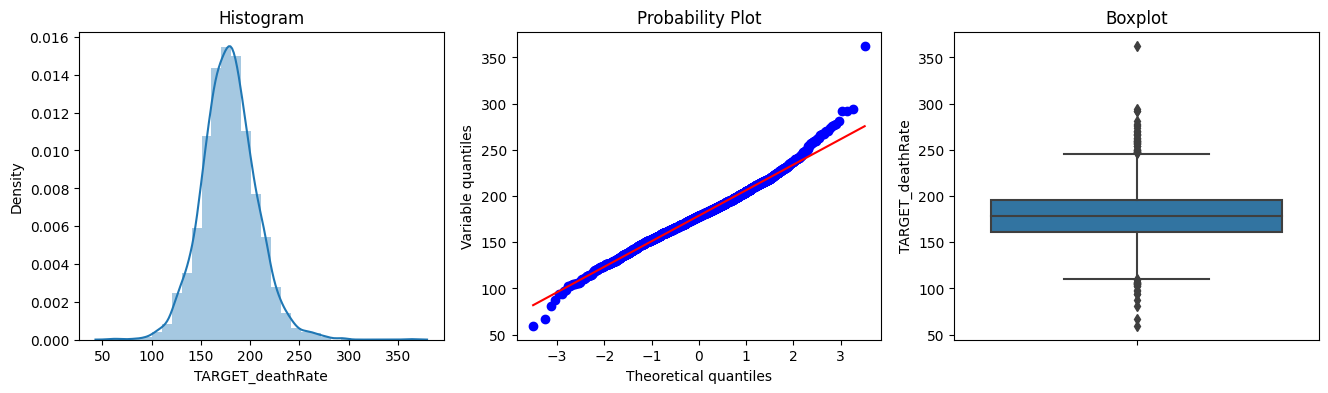

In [60]:
# Discretized TARGET_deathRate, Let see the range of TARGET_deathRate values
diagnostic_plots(final_data, 'TARGET_deathRate')

In [61]:
# We discretized TARGET_deathRate by quantile rate
lower_bound = final_data['TARGET_deathRate'].quantile(0.3)
upper_bound = final_data['TARGET_deathRate'].quantile(0.9)

final_data['TARGET_deathRate_class'] = final_data['TARGET_deathRate'].astype(int)

num_low = 0
num_med = 0
num_high = 0

for i in range(len(final_data['TARGET_deathRate'])):
  if final_data['TARGET_deathRate'][i] < lower_bound:
    final_data['TARGET_deathRate_class'][i] = 0 ## That mean low level death rate
    num_low+=1
  if final_data['TARGET_deathRate'][i] > upper_bound:
    final_data['TARGET_deathRate_class'][i] = 2 ## That mean high level death rate
    num_high+=1
  if final_data['TARGET_deathRate'][i] >= lower_bound and final_data['TARGET_deathRate'][i] <= upper_bound:
    final_data['TARGET_deathRate_class'][i] = 1 ## That mean high level death rate
    num_med+=1

print(lower_bound)
print(upper_bound)

print(f'Number low level samples: {num_low}')
print(f'Number medium level samples: {num_med}')
print(f'Number high level samples: {num_high}')

final_data

<ipython-input-61-5160a952d9e0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class'][i] = 1 ## That mean high level death rate
<ipython-input-61-5160a952d9e0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class'][i] = 2 ## That mean high level death rate
<ipython-input-61-5160a952d9e0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['TARGET_deathRate_class'

164.7
213.34000000000003
Number low level samples: 911
Number medium level samples: 1831
Number high level samples: 305


incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0             451.0        33.0          27.5                   5.1   
1             509.8        32.4          34.4                  10.0   
2             502.6        40.6          43.3                   8.1   
3             374.9        32.1          37.7                   7.2   
4             480.0        22.4          38.0                   2.1   
...             ...         ...           ...                   ...   
3042          434.4        32.8          37.0                  12.4   
3043          444.5        23.8          29.9                   5.8   
3044          460.9        32.7          38.1                   9.3   
3045          456.6        32.3          39.7                   9.2   
3046          473.1        30.8          38.1                   0.9   

      PctPublicCoverageAlone   PctBlack  TARGET_deathRate  PctBachDeg18_24  \
0                       13.4   1.114847             168.2              5.4   
1                       28.3   0.476142             215.7              5.2   
2                       17.6   1.226049             194.4              7.7   
3                       19.5  24.773119             151.9              1.0   
4                       12.8   0.373037             138.4             11.7   
...                      ...        ...               ...              ...   
3042                    20.6  20.045550             209.9              6.3   
3043                    12.4   3.597002             155.9             14.5   
3044                    18.6   4.119072             184.5              5.4   
3045                    19.5  12.058443             185.0              6.6   
3046                    14.6   0.192678             165.6              0.0   

      PctBachDeg25_Over  PctEmployed16_Over  PctEmpPrivCoverage  \
0                  14.5           65.700000                50.2   
1                  10.0           48.500000                36.0   
2                  11.2           55.700000                43.0   
3                   8.8           42.800000                34.9   
4                  14.7           63.500000                48.2   
...                 ...                 ...                 ...   
3042                7.8           41.000000                35.4   
3043               20.6           55.400000                57.1   
3044               10.2           52.200000                43.3   
3045               10.1           57.100000                48.1   
3046               20.0           61.237639                42.1   

      PctMarriedHouseholds  binnedInc_decile  TARGET_deathRate_class  
0                47.122716               9.0                       1  
1                47.253491               3.0                       2  
2                51.669941               7.0                       1  
3                45.847176               2.0                       0  
4                54.529228               8.0                       0  
...                    ...               ...                     ...  
3042             45.245154               3.0                       1  
3043             40.421223               5.0                       0  
3044             54.660481               5.0                       1  
3045             46.131146               5.0                       1  
3046             62.553191               5.0                       1  

[3047 rows x 14 columns]

In [62]:
final_data_class = final_data.drop(labels='TARGET_deathRate', axis=1)
final_data_class

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
0             451.0        33.0          27.5                   5.1   
1             509.8        32.4          34.4                  10.0   
2             502.6        40.6          43.3                   8.1   
3             374.9        32.1          37.7                   7.2   
4             480.0        22.4          38.0                   2.1   
...             ...         ...           ...                   ...   
3042          434.4        32.8          37.0                  12.4   
3043          444.5        23.8          29.9                   5.8   
3044          460.9        32.7          38.1                   9.3   
3045          456.6        32.3          39.7                   9.2   
3046          473.1        30.8          38.1                   0.9   

      PctPublicCoverageAlone   PctBlack  PctBachDeg18_24  PctBachDeg25_Over  \
0                       13.4   1.114847              5.4               14.5   
1                       28.3   0.476142              5.2               10.0   
2                       17.6   1.226049              7.7               11.2   
3                       19.5  24.773119              1.0                8.8   
4                       12.8   0.373037             11.7               14.7   
...                      ...        ...              ...                ...   
3042                    20.6  20.045550              6.3                7.8   
3043                    12.4   3.597002             14.5               20.6   
3044                    18.6   4.119072              5.4               10.2   
3045                    19.5  12.058443              6.6               10.1   
3046                    14.6   0.192678              0.0               20.0   

      PctEmployed16_Over  PctEmpPrivCoverage  PctMarriedHouseholds  \
0              65.700000                50.2             47.122716   
1              48.500000                36.0             47.253491   
2              55.700000                43.0             51.669941   
3              42.800000                34.9             45.847176   
4              63.500000                48.2             54.529228   
...                  ...                 ...                   ...   
3042           41.000000                35.4             45.245154   
3043           55.400000                57.1             40.421223   
3044           52.200000                43.3             54.660481   
3045           57.100000                48.1             46.131146   
3046           61.237639                42.1             62.553191   

      binnedInc_decile  TARGET_deathRate_class  
0                  9.0                       1  
1                  3.0                       2  
2                  7.0                       1  
3                  2.0                       0  
4                  8.0                       0  
...                ...                     ...  
3042               3.0                       1  
3043               5.0                       0  
3044               5.0                       1  
3045               5.0                       1  
3046               5.0                       1  

[3047 rows x 13 columns]

In [63]:
X_class = final_data_class.drop(labels='TARGET_deathRate_class', axis=1)
y_class = final_data_class['TARGET_deathRate_class']

cols = X_class.columns
SS = StandardScaler()
X_class = SS.fit_transform(X_class)
X_class = pd.DataFrame(X_class, columns=cols)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class,y_class,train_size=0.8)
X_class

X_train_class

incidenceRate  PctHS18_24  PctHS25_Over  PctUnemployed16_Over  \
692        0.211385    0.661422      0.056206              1.404363   
1820       0.940967    0.065937     -0.967427              0.390401   
2355       1.646718   -0.198723      0.198377              0.651134   
1403      -0.543861    0.694505      0.610674              0.129668   
2477       1.379083   -1.125034     -0.754170              0.216579   
...             ...         ...           ...                   ...   
1215       1.450574   -0.717016      0.184160              1.375393   
611       -0.261560   -0.297971     -0.199702             -0.681502   
2451       1.228767    0.231350      0.909234              1.433334   
2066      -1.066300    1.422320      1.236228              0.969808   
460        0.238882   -0.672906     -0.213919              0.824956   

      PctPublicCoverageAlone  PctBlack  PctBachDeg18_24  PctBachDeg25_Over  \
692                 0.157055  1.799172        -1.359951          -0.905104   
1820               -0.644641  0.508525         0.031295           1.041550   
2355                0.926030 -0.487353        -0.807869          -1.257356   
1403                1.155086  1.317003        -0.609120          -0.868025   
2477               -0.219251 -0.320432         0.671710           0.633679   
...                      ...       ...              ...                ...   
1215                2.513062 -0.613665        -1.139118          -1.146119   
611                -1.020948  0.128252        -0.962452          -0.886565   
2451                2.333089  2.172877        -0.896202          -1.034881   
2066                0.157055  1.745098        -0.255788          -1.053421   
460                 0.566084  0.359512         0.031295          -0.960723   

      PctEmployed16_Over  PctEmpPrivCoverage  PctMarriedHouseholds  \
692            -0.600205           -1.460526             -0.983513   
1820            0.814570            0.984919              0.782370   
2355           -0.056061           -1.365248              0.315797   
1403           -0.999244           -0.878277             -1.034529   
2477            0.306702            0.699087             -0.615916   
...                  ...                 ...                   ...   
1215           -1.954519           -1.090004              0.161317   
611            -1.906151           -0.338374              0.819458   
2451           -1.120165           -1.989842             -2.025772   
2066           -1.035520           -0.031370             -0.079286   
460            -0.242612           -0.539514              0.098289   

      binnedInc_decile  
692          -1.218383  
1820          1.219869  
2355         -1.218383  
1403         -1.566705  
2477         -0.173418  
...                ...  
1215         -1.566705  
611          -0.521740  
2451         -1.566705  
2066         -0.870061  
460          -0.870061  

[2437 rows x 12 columns]

### Decision Tree Classifier

#### Entropy

In [64]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test_class)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test_class, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_class, tree_pred))

Accuracy: 0.659016393442623
Report:               precision    recall  f1-score   support

           0       0.58      0.63      0.60       186
           1       0.74      0.72      0.73       369
           2       0.39      0.36      0.38        55

    accuracy                           0.66       610
   macro avg       0.57      0.57      0.57       610
weighted avg       0.66      0.66      0.66       610



In [66]:
tree_cm = metrics.confusion_matrix(y_test_class, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.659016393442623')

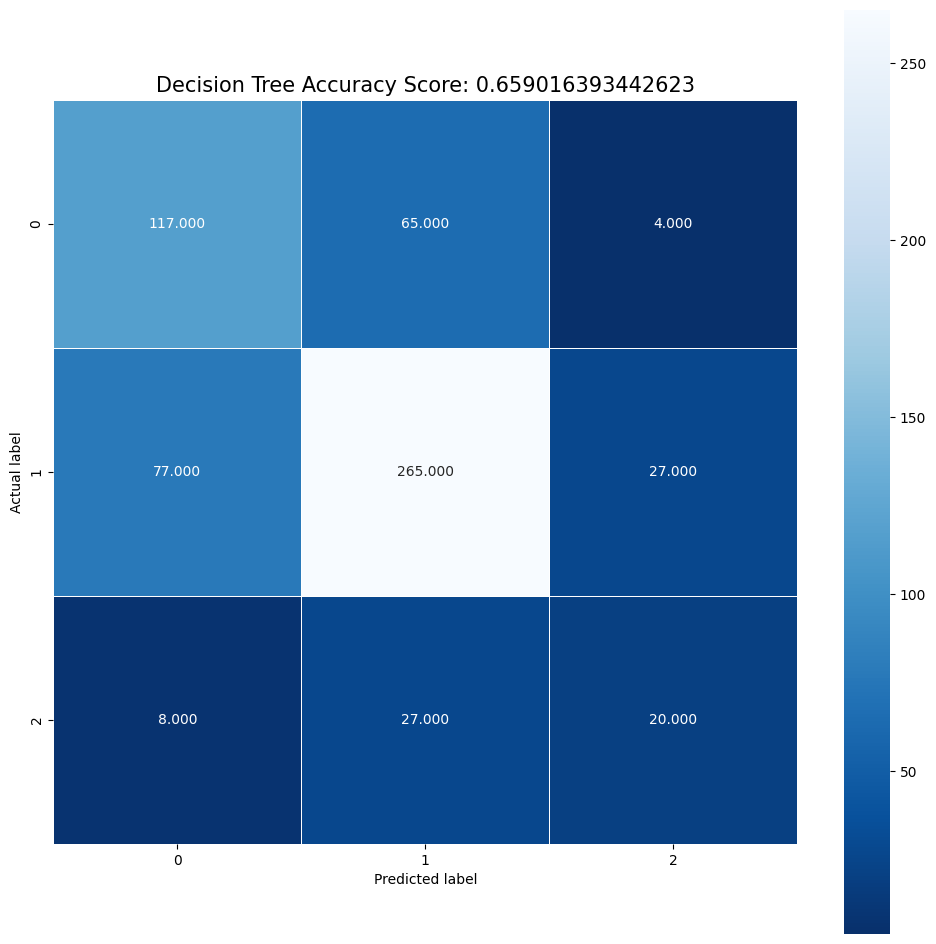

In [67]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

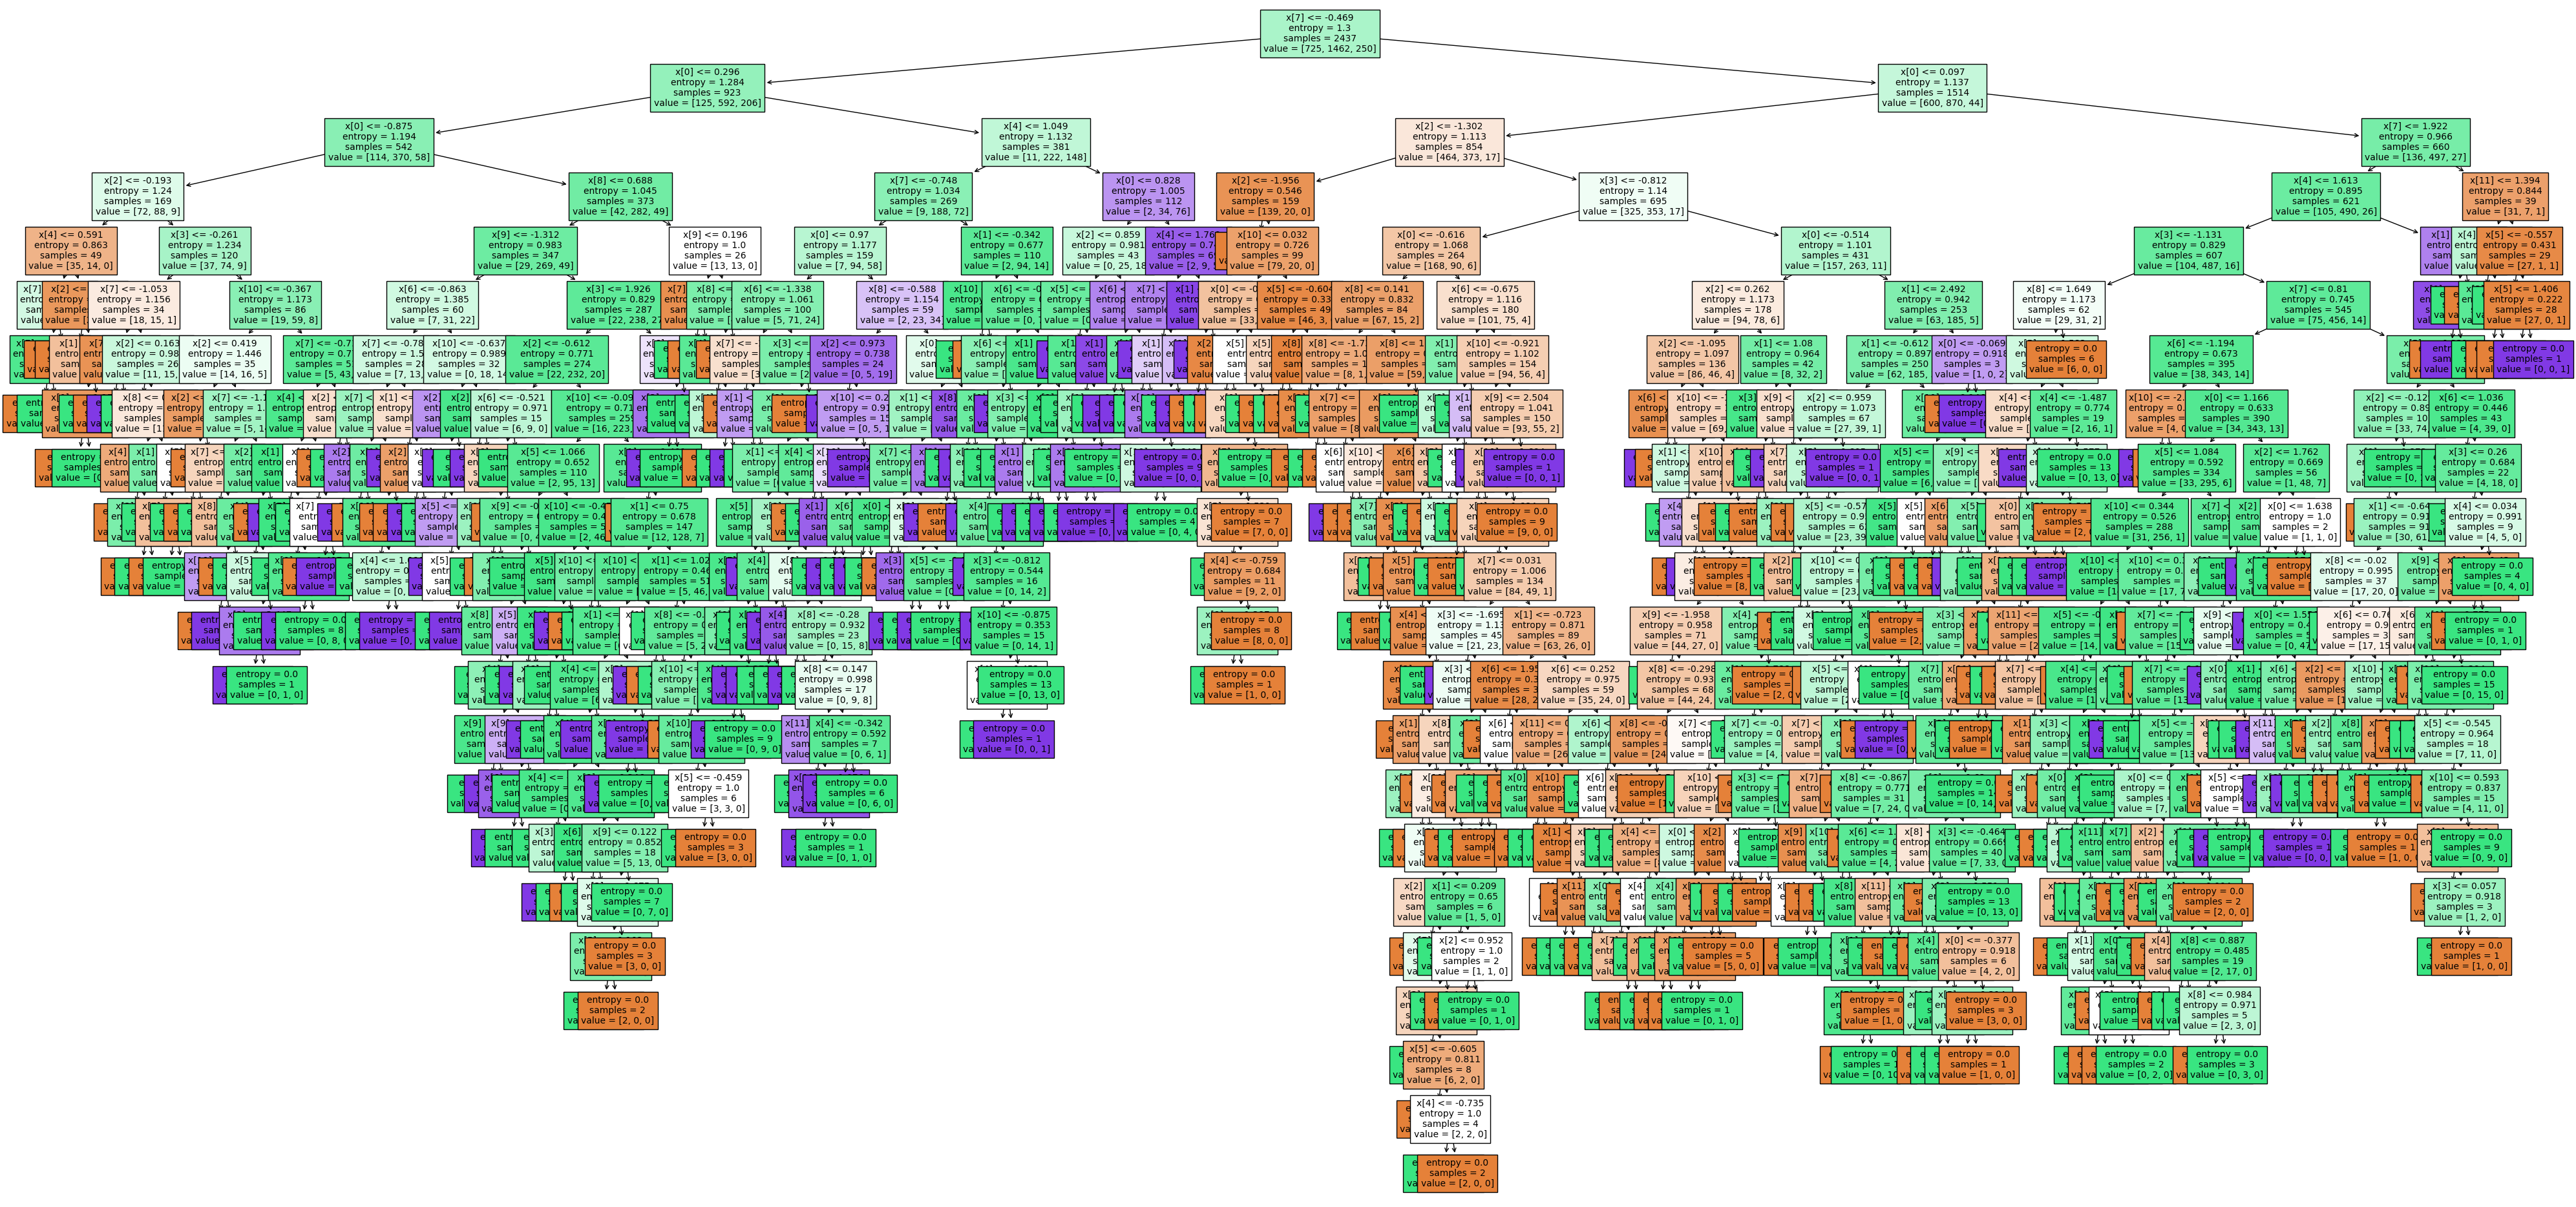

In [68]:
# Draw tree Entropy
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_entropy', dpi=100)
plt.show()

#### Gini

In [69]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=0)

In [70]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test_class)
#Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test_class, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test_class, tree_pred))

Accuracy: 0.6524590163934426
Report:               precision    recall  f1-score   support

           0       0.59      0.61      0.60       186
           1       0.72      0.71      0.72       369
           2       0.43      0.44      0.43        55

    accuracy                           0.65       610
   macro avg       0.58      0.58      0.58       610
weighted avg       0.65      0.65      0.65       610



In [71]:
tree_cm = metrics.confusion_matrix(y_test_class, tree_pred)

Text(0.5, 1.0, 'Decision Tree Accuracy Score: 0.6524590163934426')

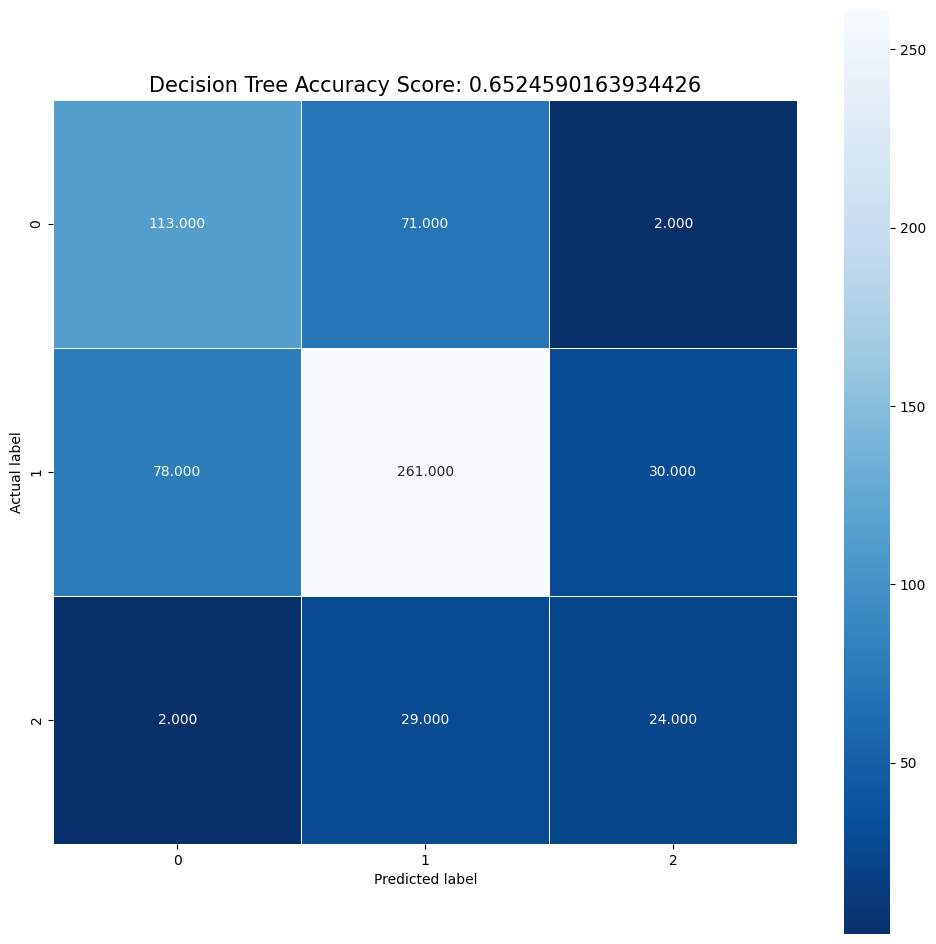

In [72]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15)

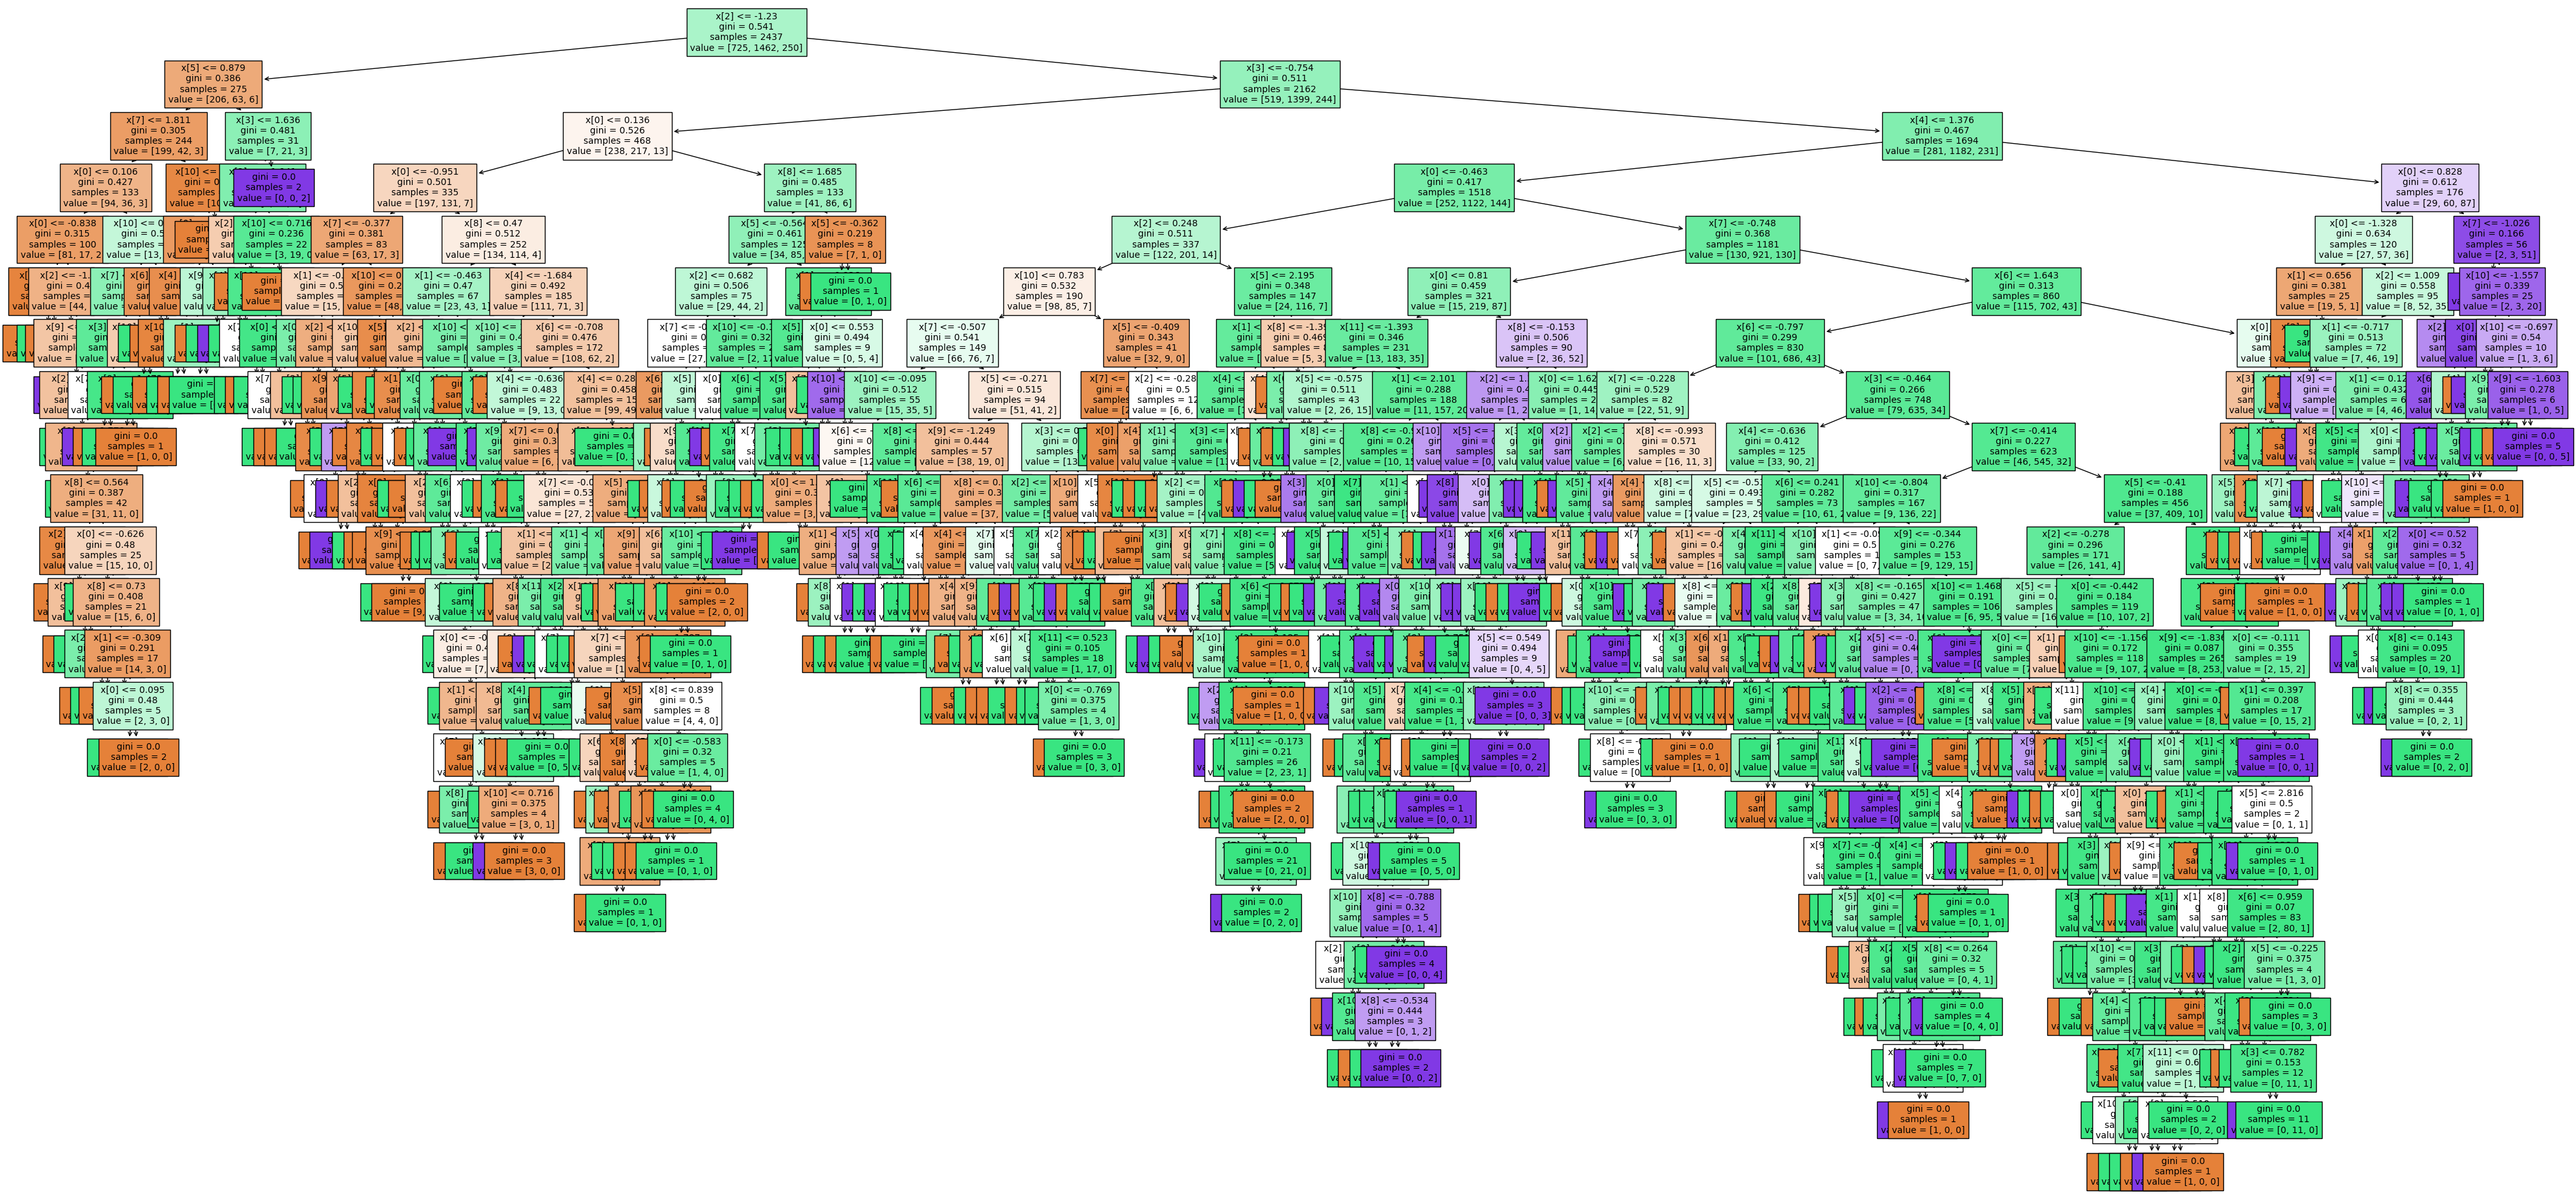

In [73]:
# Draw tree Gini

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree_gini', dpi=100)
plt.show()

### Naive Bayes

In [74]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train_class, y_train_class).predict(X_test_class)

In [75]:
#Model Accuracy, how often is the classifier correct ?
bayes_score = metrics.accuracy_score(y_test_class, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test_class,bayes_pred))

Accuracy: 0.6131147540983607
Report:               precision    recall  f1-score   support

           0       0.63      0.62      0.62       186
           1       0.74      0.61      0.67       369
           2       0.28      0.64      0.39        55

    accuracy                           0.61       610
   macro avg       0.55      0.62      0.56       610
weighted avg       0.66      0.61      0.63       610



Text(0.5, 1.0, 'Naive Bayes Accuracy Score: 0.6131147540983607')

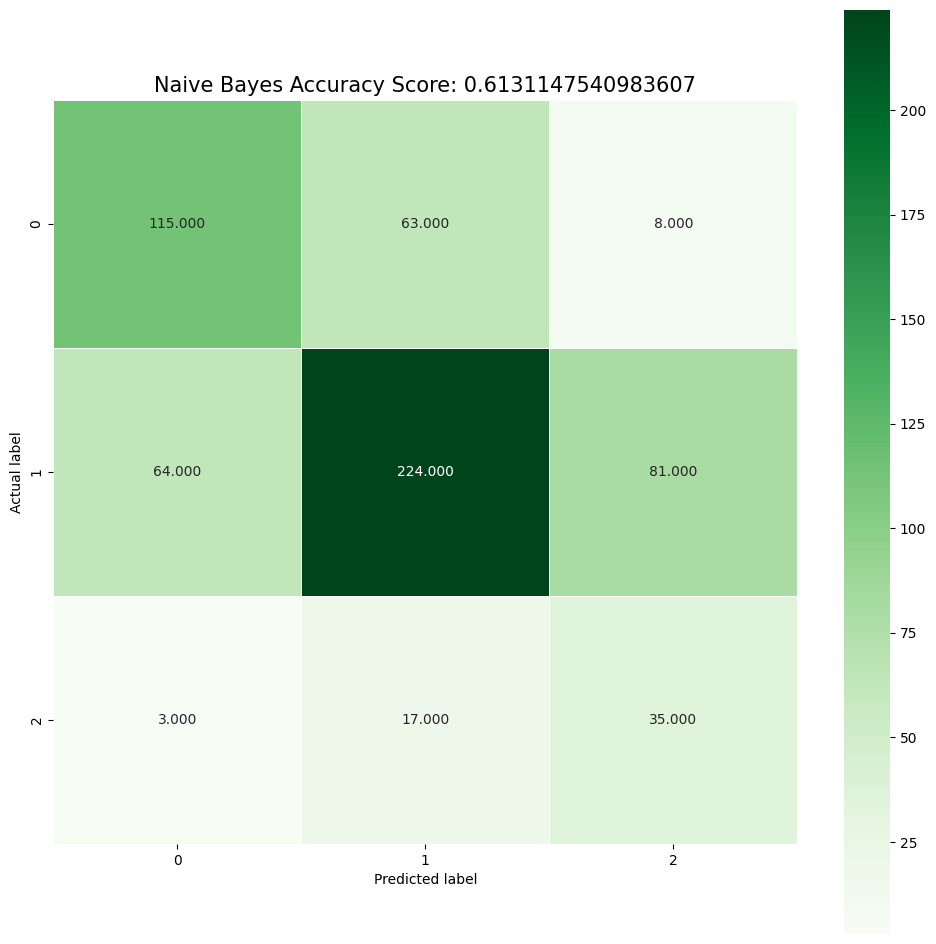

In [76]:
bayes_cm = metrics.confusion_matrix(y_test_class,bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15)

### Random Forest Classifier

In [77]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train_class, y_train_class)
y_pred = rf.predict(X_test_class)

classes = target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_class, y_pred, target_names=classes))

              precision    recall  f1-score   support

     class 0       0.70      0.62      0.66       186
     class 1       0.75      0.85      0.79       369
     class 2       0.68      0.31      0.42        55

    accuracy                           0.73       610
   macro avg       0.71      0.59      0.62       610
weighted avg       0.72      0.73      0.72       610



Text(0.5, 1.0, 'Random Forest Accuracy Score: 0.7295081967213115')

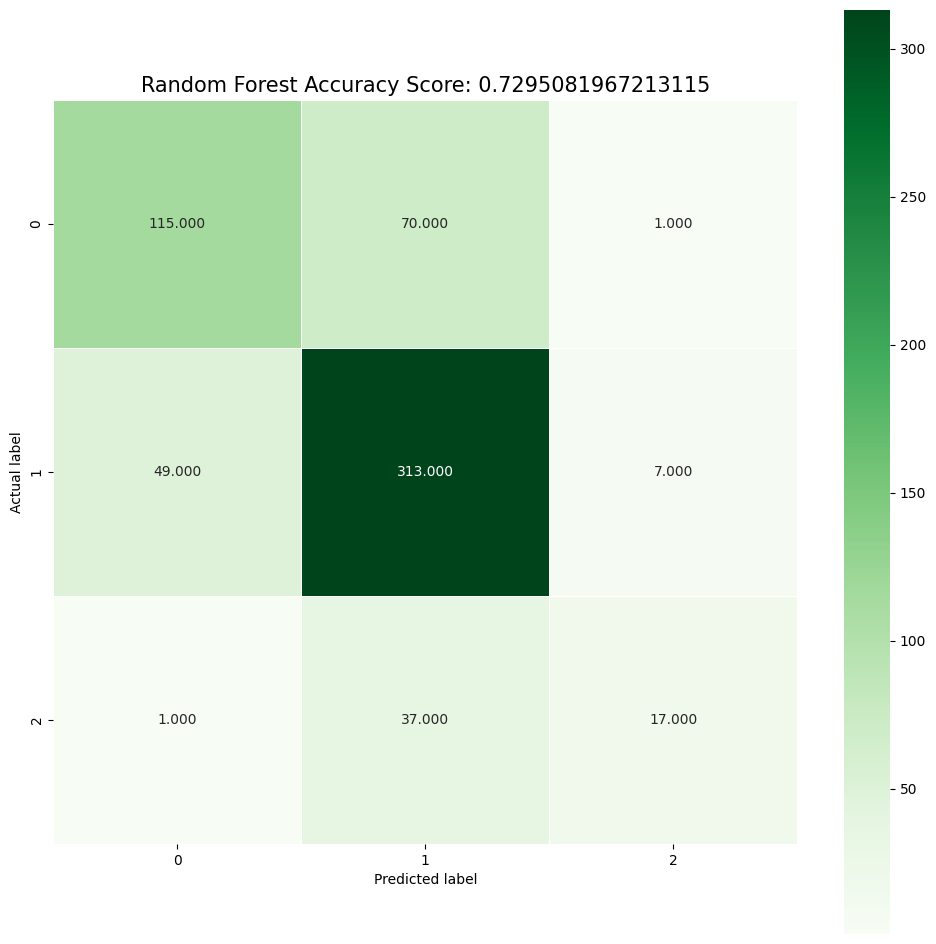

In [78]:
rd_cm = metrics.confusion_matrix(y_test_class,y_pred)
rd_score = metrics.accuracy_score(y_test_class, y_pred)

plt.figure(figsize=(12,12))
sns.heatmap(rd_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Random Forest Accuracy Score: {0}'.format(rd_score)
plt.title(title, size = 15)

### Logistic Regression

In [79]:
from sklearn.metrics import classification_report
log = LogisticRegression()
log.fit(X_train_class, y_train_class)
y_pred = log.predict(X_test_class)

classes = target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_class, y_pred, target_names=classes))

              precision    recall  f1-score   support

     class 0       0.74      0.56      0.64       186
     class 1       0.73      0.88      0.80       369
     class 2       0.62      0.24      0.34        55

    accuracy                           0.73       610
   macro avg       0.70      0.56      0.59       610
weighted avg       0.72      0.73      0.71       610



Text(0.5, 1.0, 'Logistic Regression Accuracy Score: 0.7262295081967213')

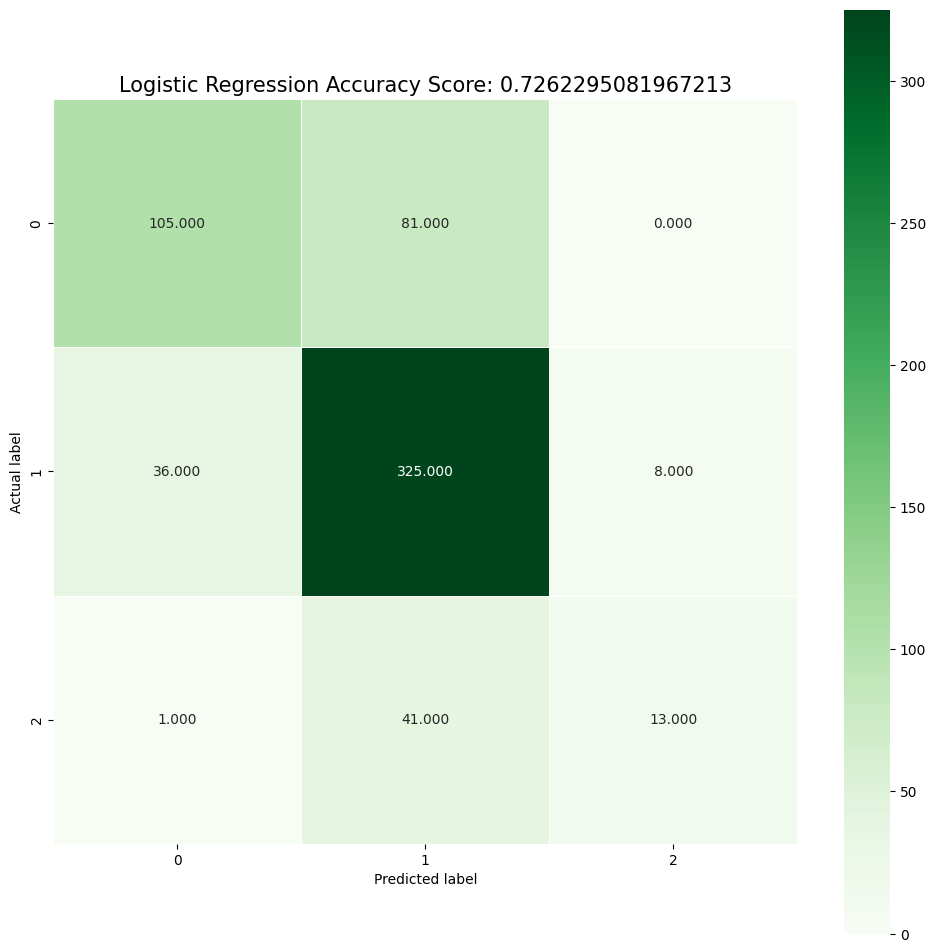

In [80]:
lg_cm = metrics.confusion_matrix(y_test_class,y_pred)
lg_score = metrics.accuracy_score(y_test_class, y_pred)

plt.figure(figsize=(12,12))
sns.heatmap(lg_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap='Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Logistic Regression Accuracy Score: {0}'.format(lg_score)
plt.title(title, size = 15)